In [2]:
# importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

In [4]:
app_data = pd.read_csv(r"C:\Users\Admin\Downloads\application_data.csv\application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Data quality check
#check for percentage null values in given dataset
pd.set_option('display.max_rows',200)
app_data.isnull().mean() * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

 Conclusion: Column with null values more than 47% gives wrong insights, hence we drop them

# Dropping columns with missing values more than 47%  

In [7]:
percentage = 47
threshold = int(((100-percentage)/100)*app_data.shape[0] + 1)
app_df = app_data.dropna(axis = 1, thresh = threshold)

app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
app_df.shape

(307511, 73)

In [9]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

## Impute missing values

### Check the missing values

In [10]:
app_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [11]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [12]:
app_df.OCCUPATION_TYPE.fillna("Others", inplace=True)

In [13]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [14]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: EXT_SOURCE_3, Length: 814, dtype: float64

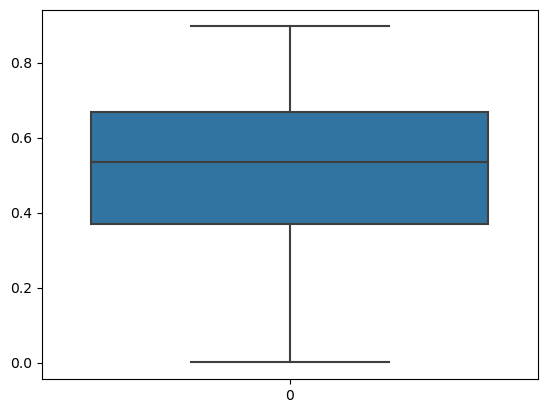

In [15]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

In [16]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(), inplace=True)

In [17]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

### Conclusion: Since its a numerical columns with no outliersand there is not much difference between Mean and Median

In [18]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [19]:
null_cols = list(app_df.isna().any())
len(null_cols)

73

In [20]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Handling missing values in columns with 13% null values

In [21]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [22]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

##### Conclusion: We could see that 99% of values in column AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK     AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR is 0.0 Hence impute these columns with mode

In [23]:
Cols=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [24]:
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0], inplace = True)

In [25]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [26]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [27]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [28]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [29]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)

In [30]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0], inplace =True)

In [31]:
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(), inplace=True) 
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True) 
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [32]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [33]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

In [34]:
app_df.DAYS_BIRTH =app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED = app_df.DAYS_EMPLOYED.apply(lambda x: abs(x)) 
app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x)) 
app_df.DAYS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [35]:
app_df["YEARS_BIRTH"] =app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
app_df["YEARS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356)) 
app_df["YEARS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
app_df["YEARS_ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356)) 
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))

In [36]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: AMT_CREDIT, Length: 5603, dtype: float64

In [37]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [38]:
app_df["AMT_CREDIT_Category"] = pd.cut(app_df.AMT_CREDIT, [0, 200000, 400000, 600000, 800000, 1000000],
                                       labels = ["Very low Credit", "Low Credit", "Medium Credit","High Credit", "Very high Credit"])

In [39]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

Low Credit          31.511770
Medium Credit       25.733324
High Credit         16.791314
Very low Credit     14.035088
Very high Credit    11.928504
Name: AMT_CREDIT_Category, dtype: float64

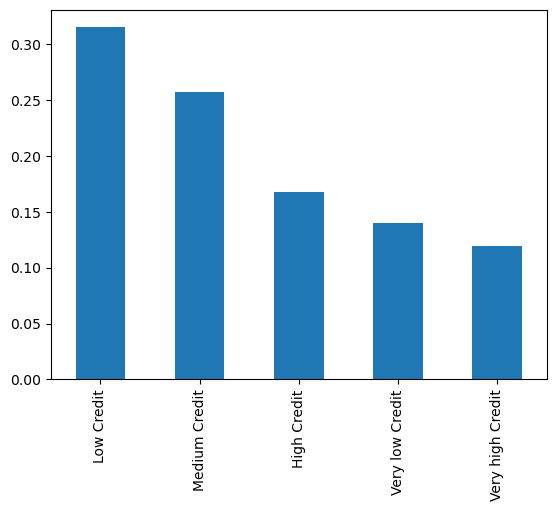

In [40]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

In [41]:
app_df["AGE_Category"] = pd.cut(app_df.YEARS_BIRTH,[0, 25, 45, 65, 85],
                               labels = ["Below 25", "25-45", "45-65", "65-85"])

In [42]:
app_df.AGE_Category.value_counts(normalize=True)*100

25-45       50.094143
45-65       41.772489
Below 25     4.426834
65-85        3.706534
Name: AGE_Category, dtype: float64

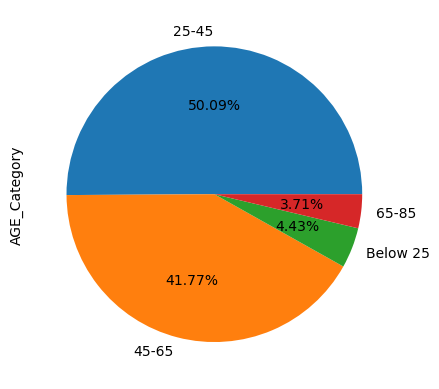

In [43]:
app_df['AGE_Category'].value_counts(normalize=True).plot.pie(autopct = '%1.2f%%')
plt.show()

In [44]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_Category,AGE_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,1,10,5,3,Medium Credit,25-45
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,47,3,3,0,2,NaN,45-65
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,0,11,7,2,Very low Credit,45-65
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,8,27,6,1,Low Credit,45-65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3,Medium Credit,45-65


In [45]:
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [46]:
app_df.TARGET.value_counts(normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [47]:
cat_cols = list(app_df.columns[app_df.dtypes == np.object])
num_cols = list(app_df.columns[app_df.dtypes == np.int64]) + list(app_df.columns[app_df.dtypes == np.float64])

In [48]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [49]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


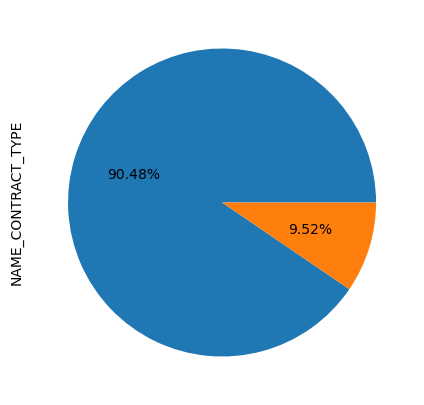

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


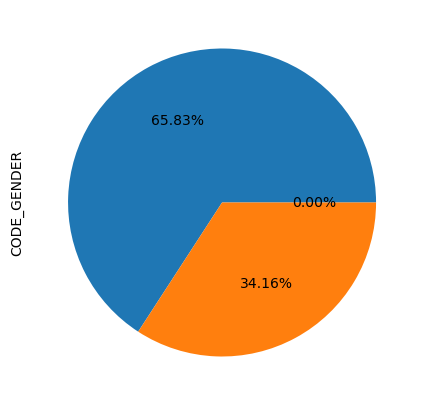

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


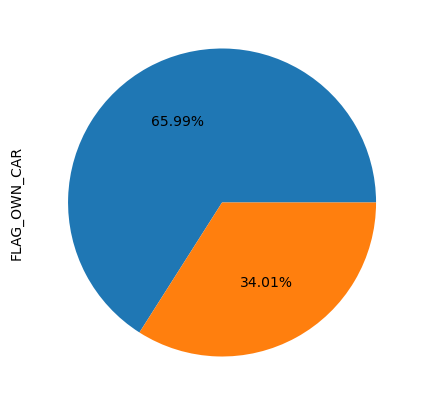

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


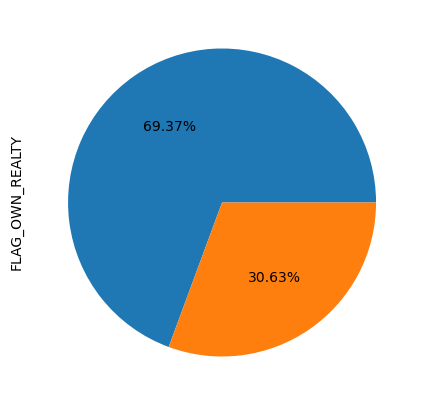

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64


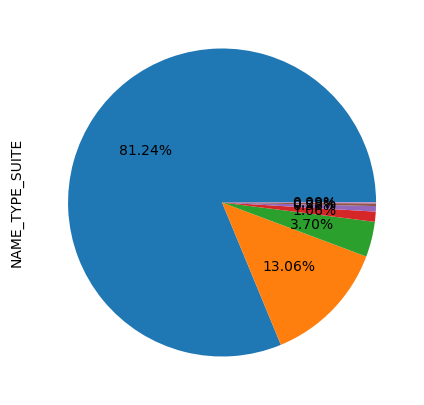

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


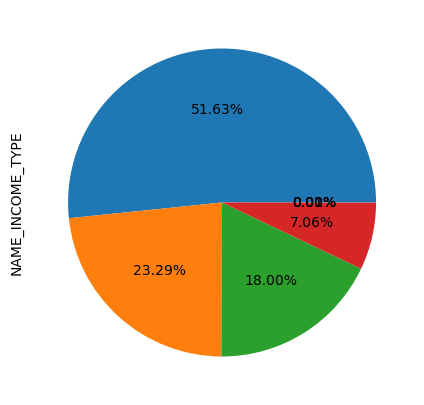

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


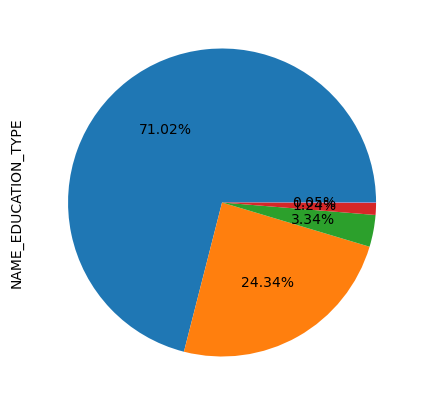

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


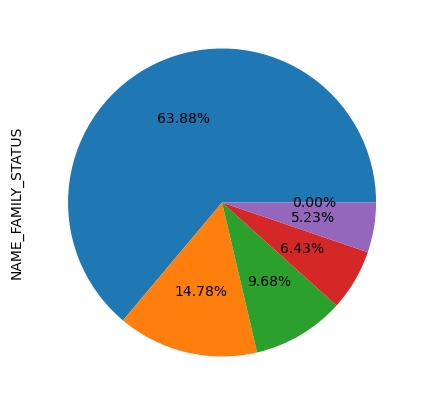

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


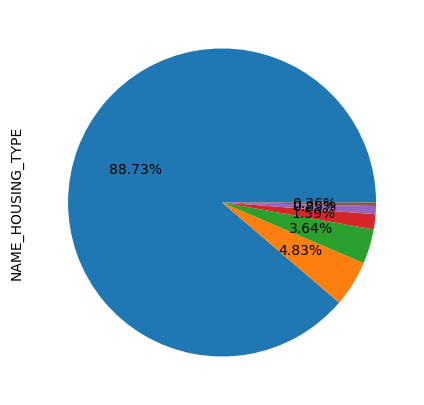

Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


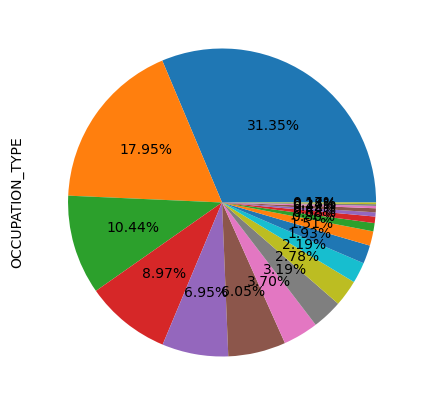

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


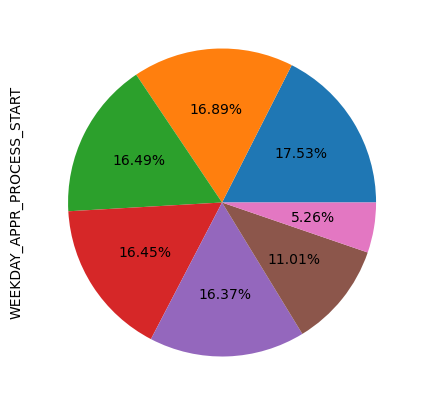

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

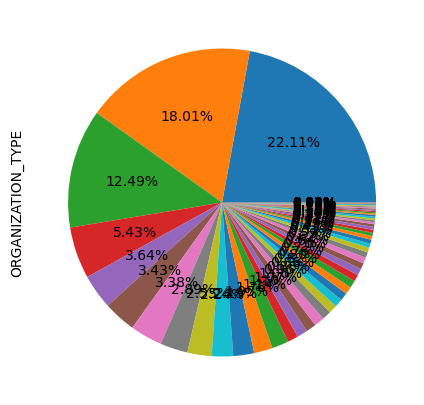

In [50]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize = True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance = None, autopct = '%1.2f%%')
    plt.show()

In [51]:
num_cols_withoutflag = []
num_cols_withflag = []
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [52]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [53]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

count    307511.000000
mean          0.999997
std           0.001803
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_MOBIL, dtype: float64


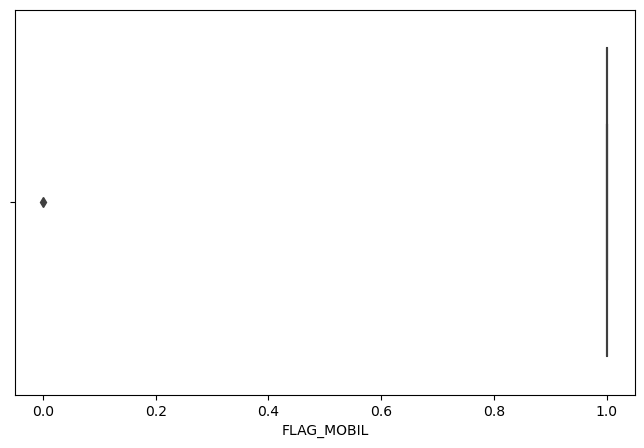

count    307511.000000
mean          0.819889
std           0.384280
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_EMP_PHONE, dtype: float64


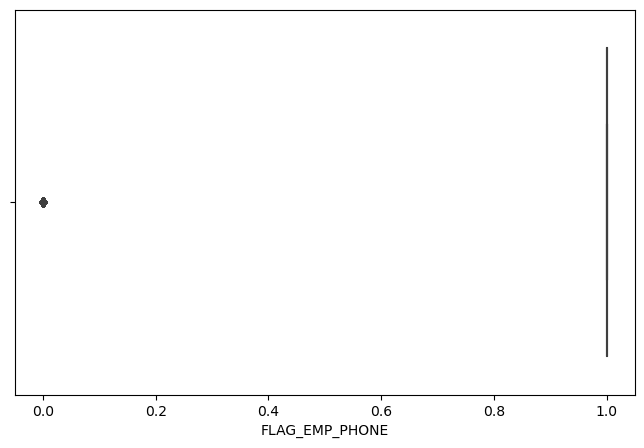

count    307511.000000
mean          0.199368
std           0.399526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_WORK_PHONE, dtype: float64


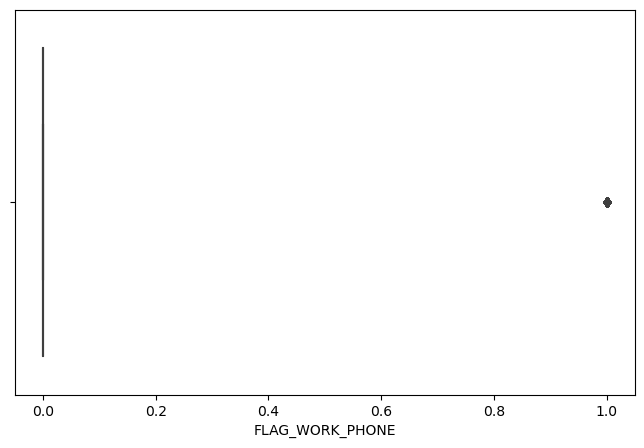

count    307511.000000
mean          0.998133
std           0.043164
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_CONT_MOBILE, dtype: float64


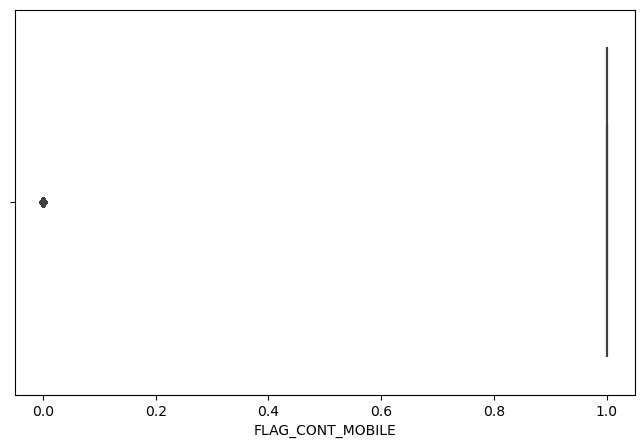

count    307511.000000
mean          0.281066
std           0.449521
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_PHONE, dtype: float64


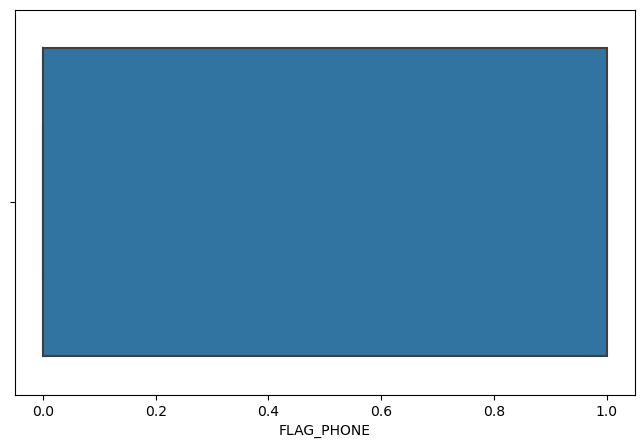

count    307511.000000
mean          0.056720
std           0.231307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64


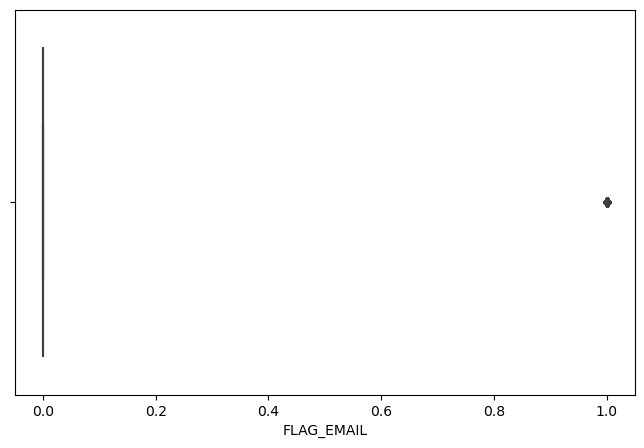

count    307511.000000
mean          0.000042
std           0.006502
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_2, dtype: float64


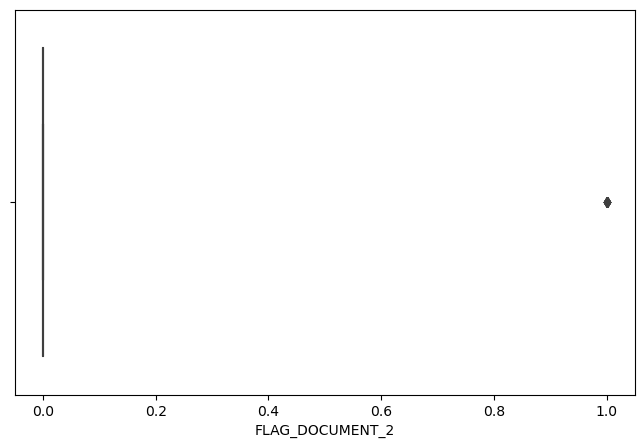

count    307511.000000
mean          0.710023
std           0.453752
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_DOCUMENT_3, dtype: float64


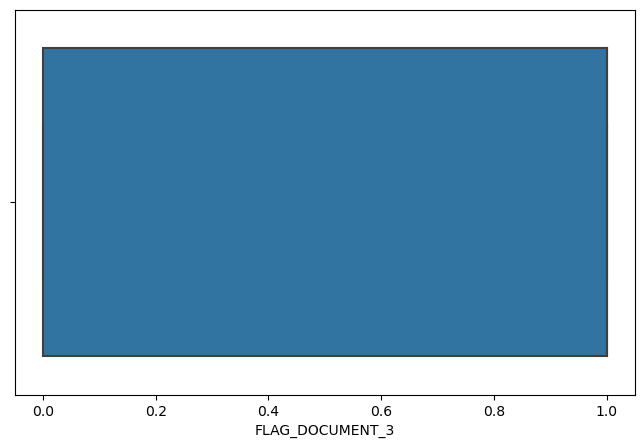

count    307511.000000
mean          0.000081
std           0.009016
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_4, dtype: float64


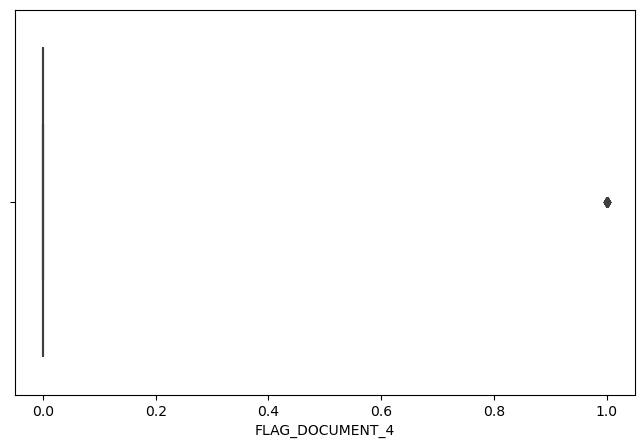

count    307511.000000
mean          0.015115
std           0.122010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_5, dtype: float64


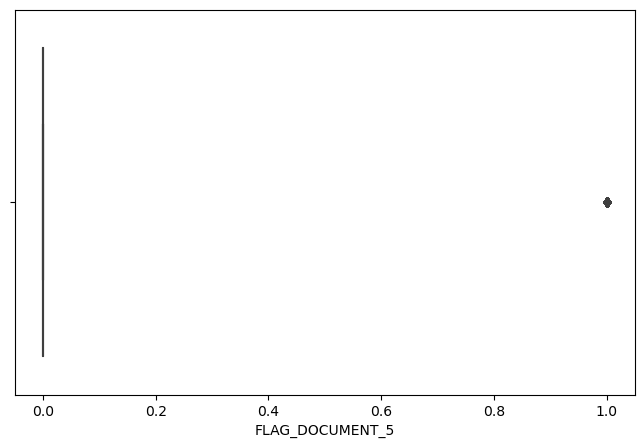

count    307511.000000
mean          0.088055
std           0.283376
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_6, dtype: float64


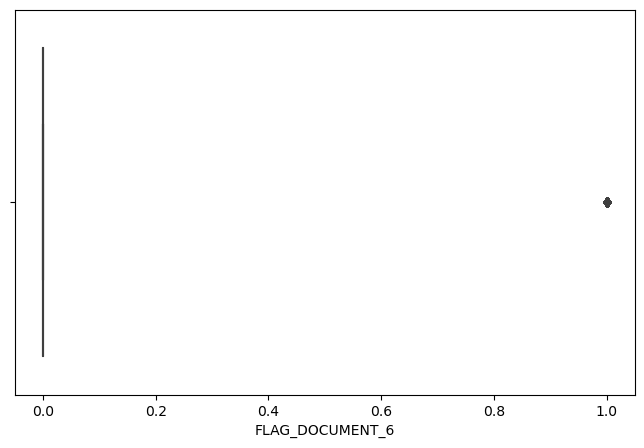

count    307511.000000
mean          0.000192
std           0.013850
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_7, dtype: float64


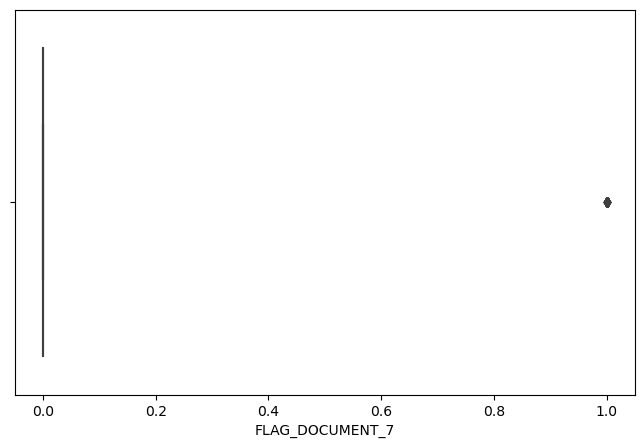

count    307511.000000
mean          0.081376
std           0.273412
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_8, dtype: float64


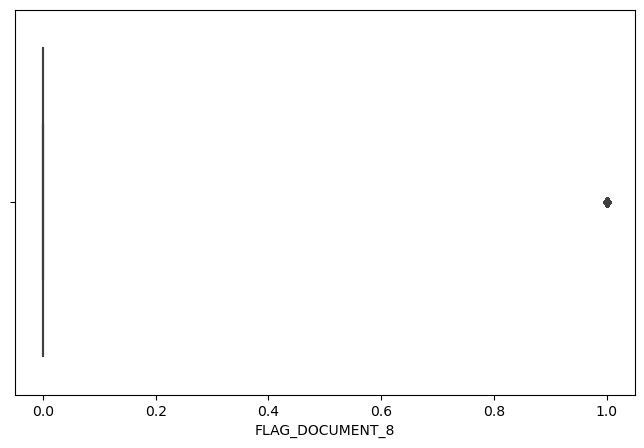

count    307511.000000
mean          0.003896
std           0.062295
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_9, dtype: float64


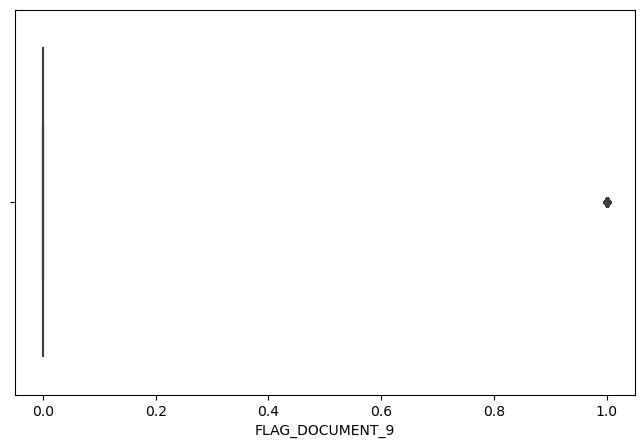

count    307511.000000
mean          0.000023
std           0.004771
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_10, dtype: float64


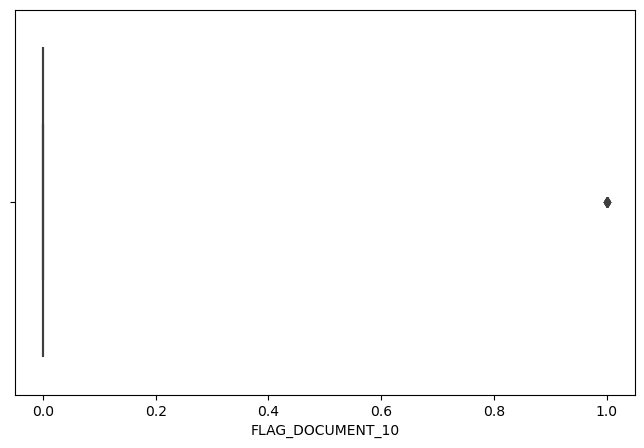

count    307511.000000
mean          0.003912
std           0.062424
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_11, dtype: float64


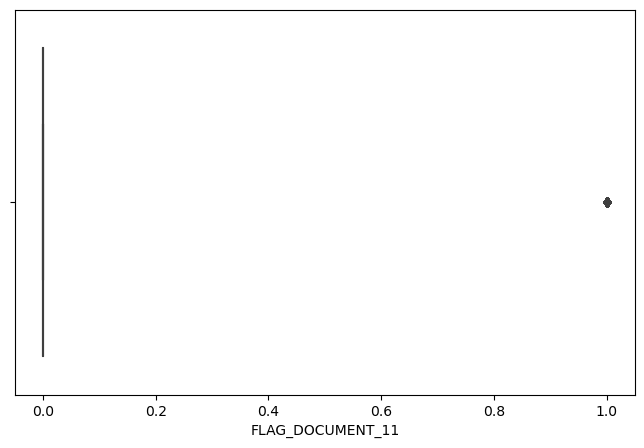

count    307511.000000
mean          0.000007
std           0.002550
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_12, dtype: float64


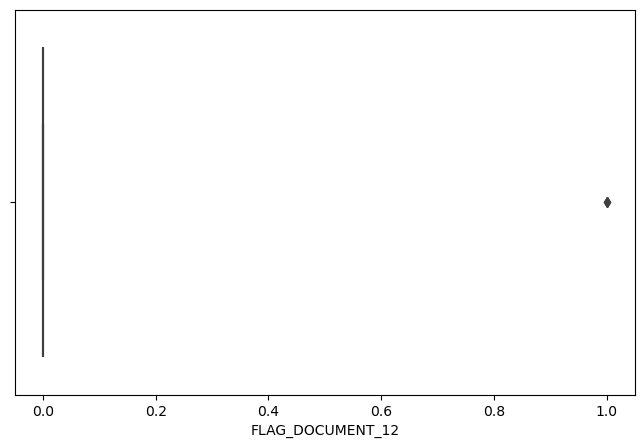

count    307511.000000
mean          0.003525
std           0.059268
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_13, dtype: float64


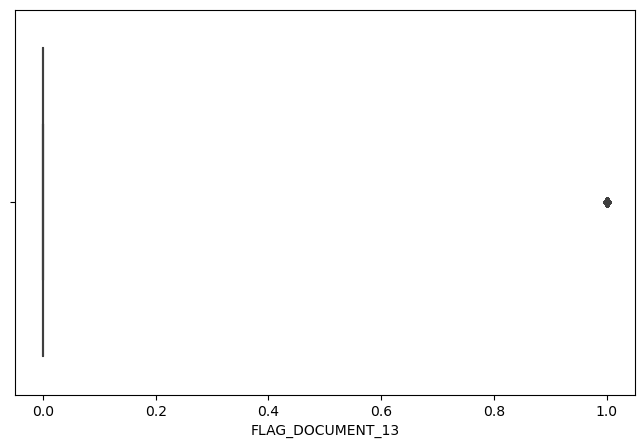

count    307511.000000
mean          0.002936
std           0.054110
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_14, dtype: float64


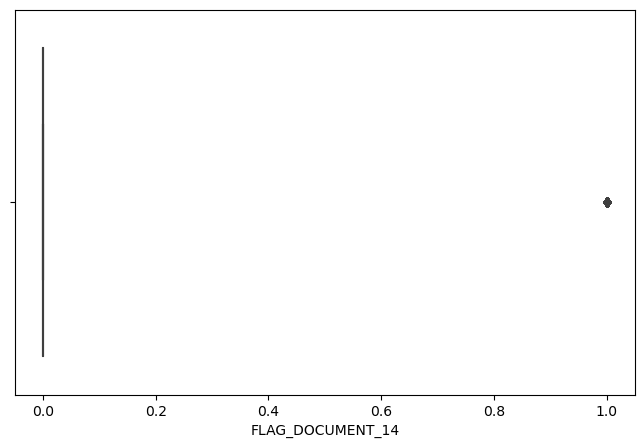

count    307511.00000
mean          0.00121
std           0.03476
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: FLAG_DOCUMENT_15, dtype: float64


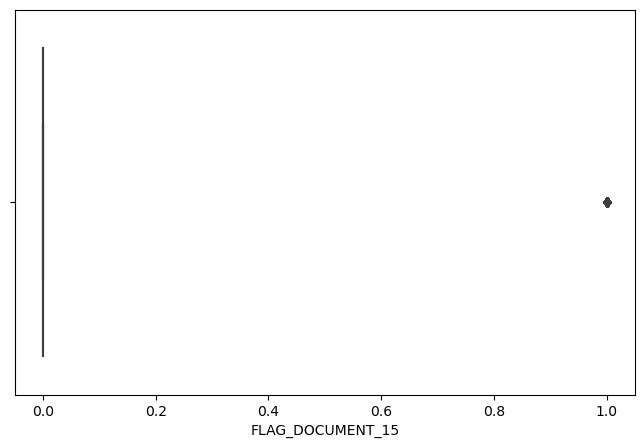

count    307511.000000
mean          0.009928
std           0.099144
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_16, dtype: float64


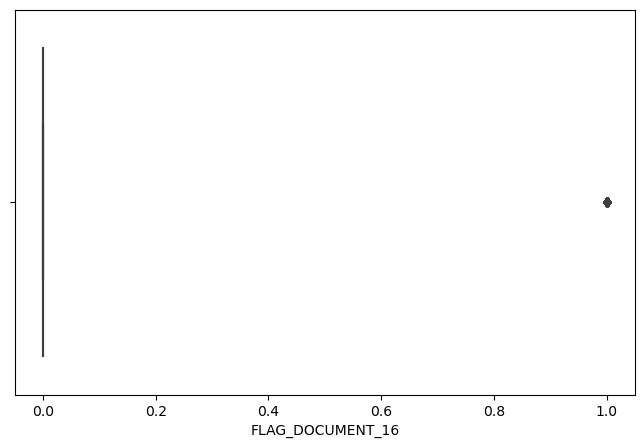

count    307511.000000
mean          0.000267
std           0.016327
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_17, dtype: float64


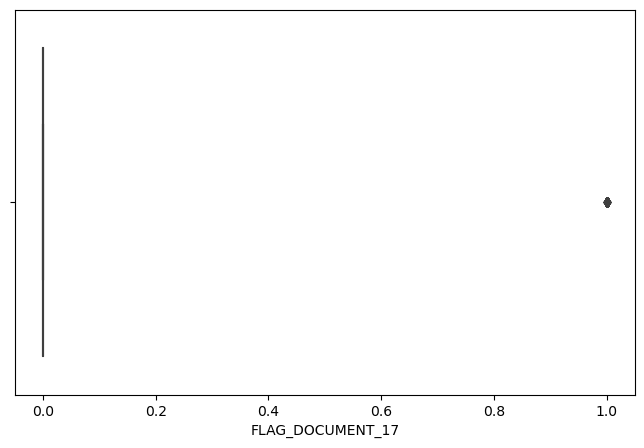

count    307511.000000
mean          0.008130
std           0.089798
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_18, dtype: float64


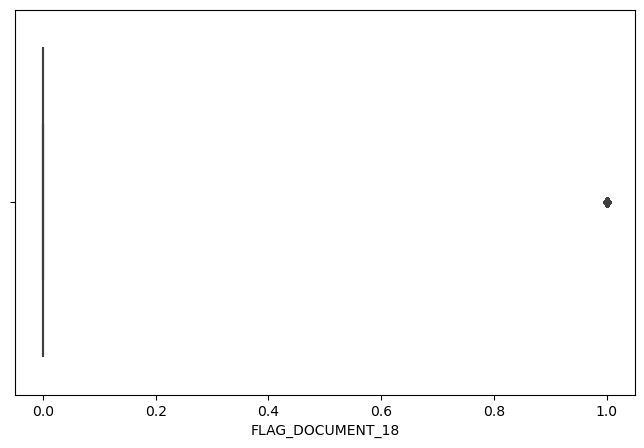

count    307511.000000
mean          0.000595
std           0.024387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_19, dtype: float64


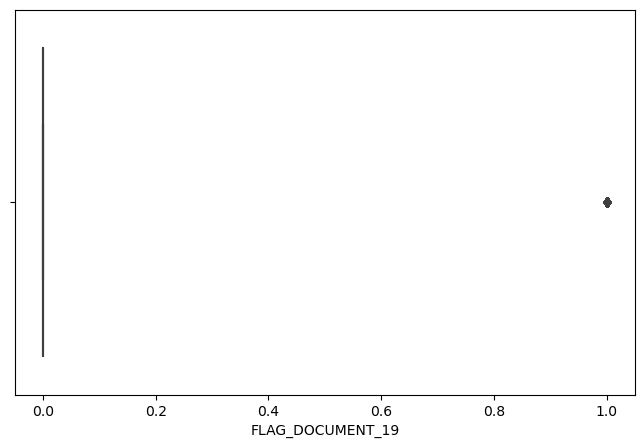

count    307511.000000
mean          0.000507
std           0.022518
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_20, dtype: float64


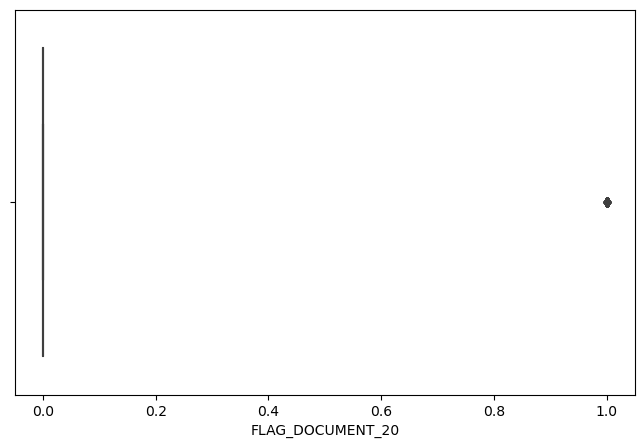

count    307511.000000
mean          0.000335
std           0.018299
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_21, dtype: float64


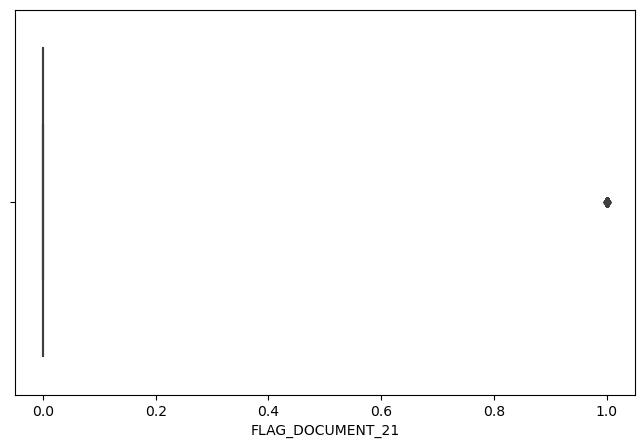

In [54]:
for col in num_cols_withflag:
    print(app_df[col].describe())
    plt.figure(figsize = [8,5])
    sns.boxplot(data=app_df, x=col)
    plt.show()
    

plot on NAME_CONTRACT_TYPE for Target 0 and 1


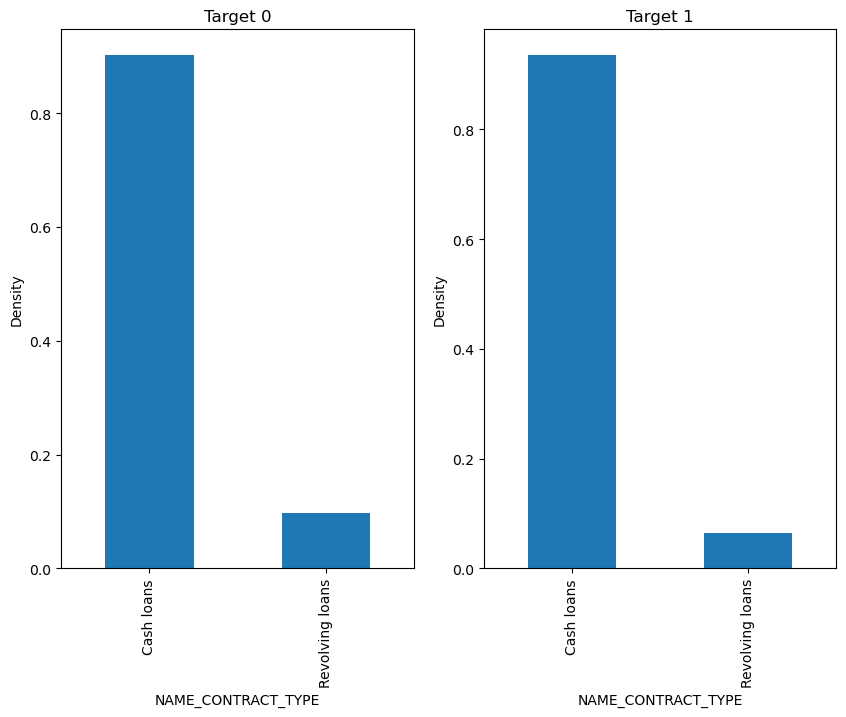



 --------------------------------------- 


plot on CODE_GENDER for Target 0 and 1


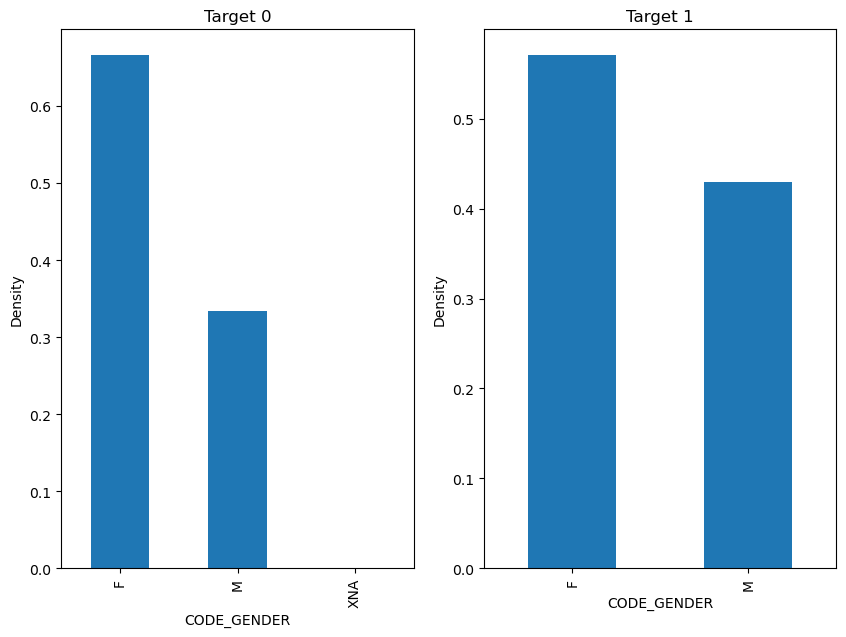



 --------------------------------------- 


plot on FLAG_OWN_CAR for Target 0 and 1


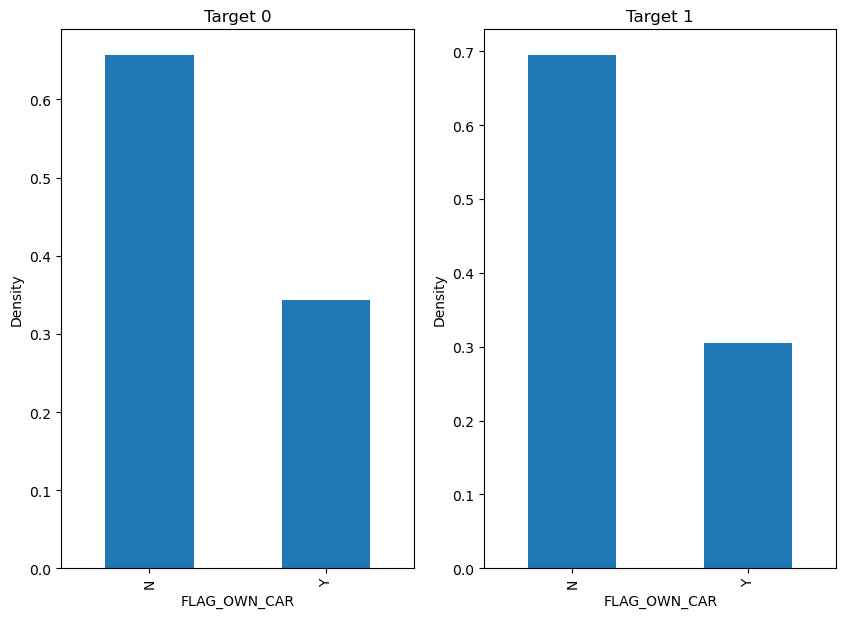



 --------------------------------------- 


plot on FLAG_OWN_REALTY for Target 0 and 1


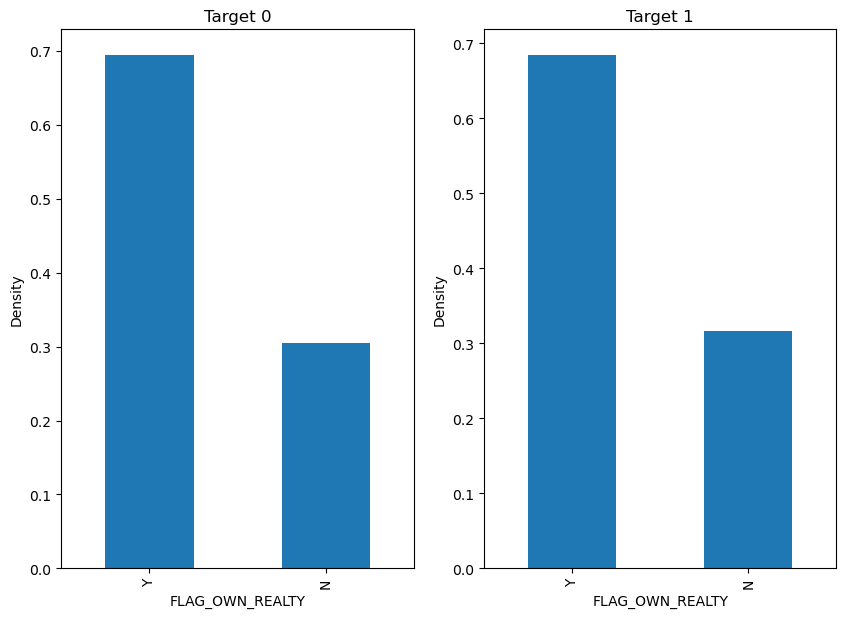



 --------------------------------------- 


plot on NAME_TYPE_SUITE for Target 0 and 1


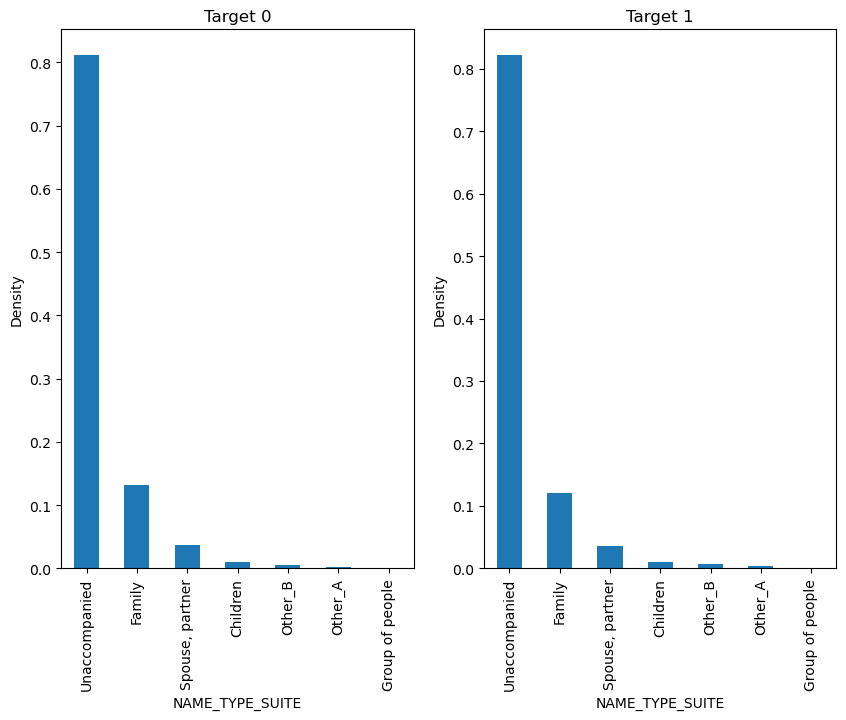



 --------------------------------------- 


plot on NAME_INCOME_TYPE for Target 0 and 1


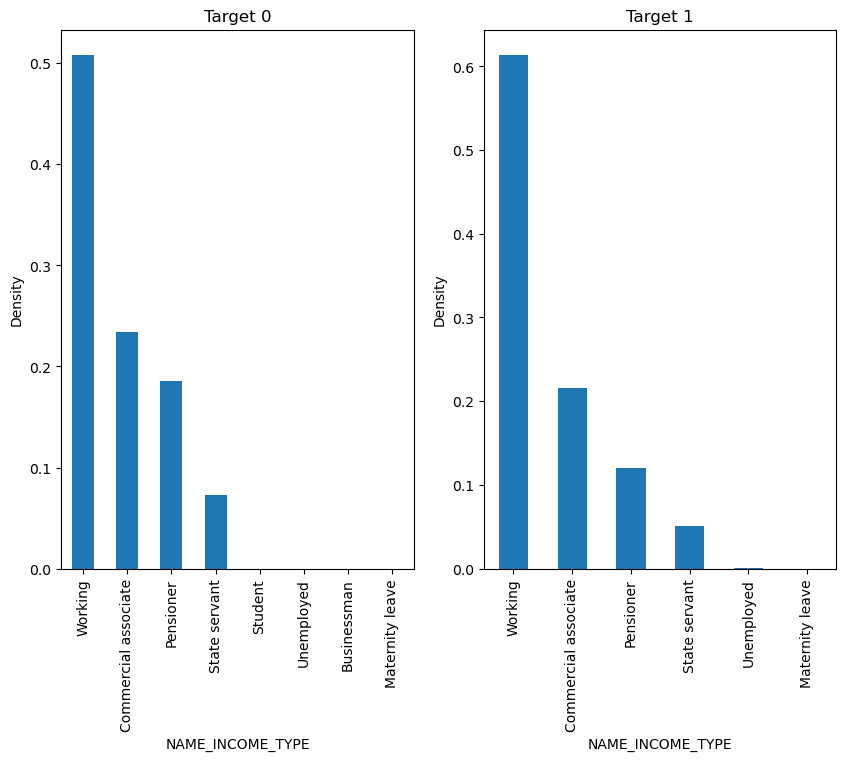



 --------------------------------------- 


plot on NAME_EDUCATION_TYPE for Target 0 and 1


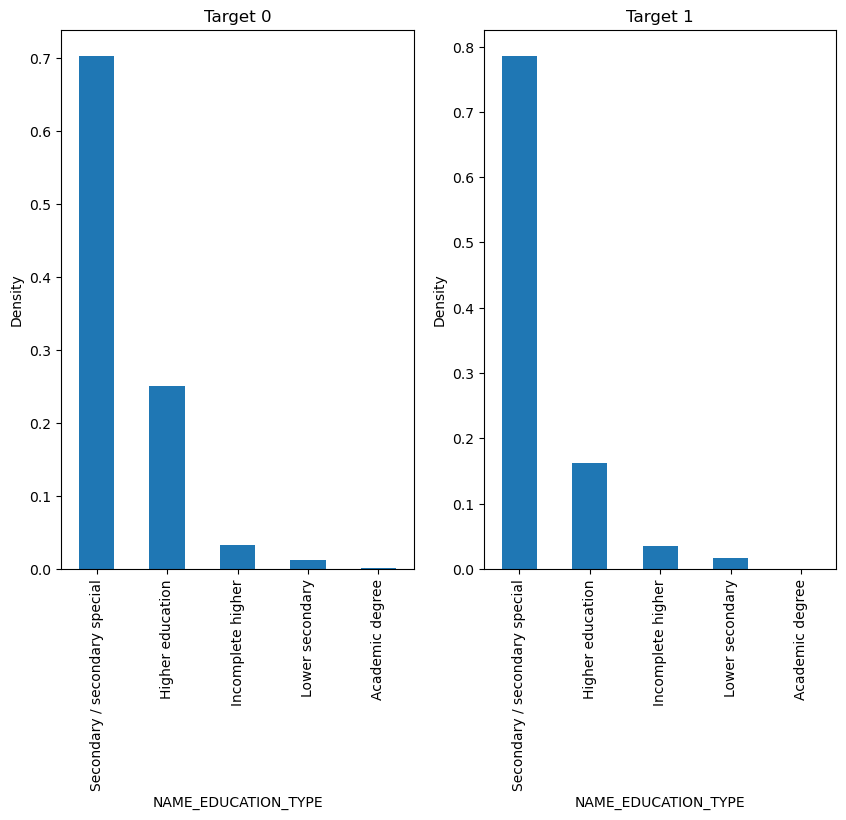



 --------------------------------------- 


plot on NAME_FAMILY_STATUS for Target 0 and 1


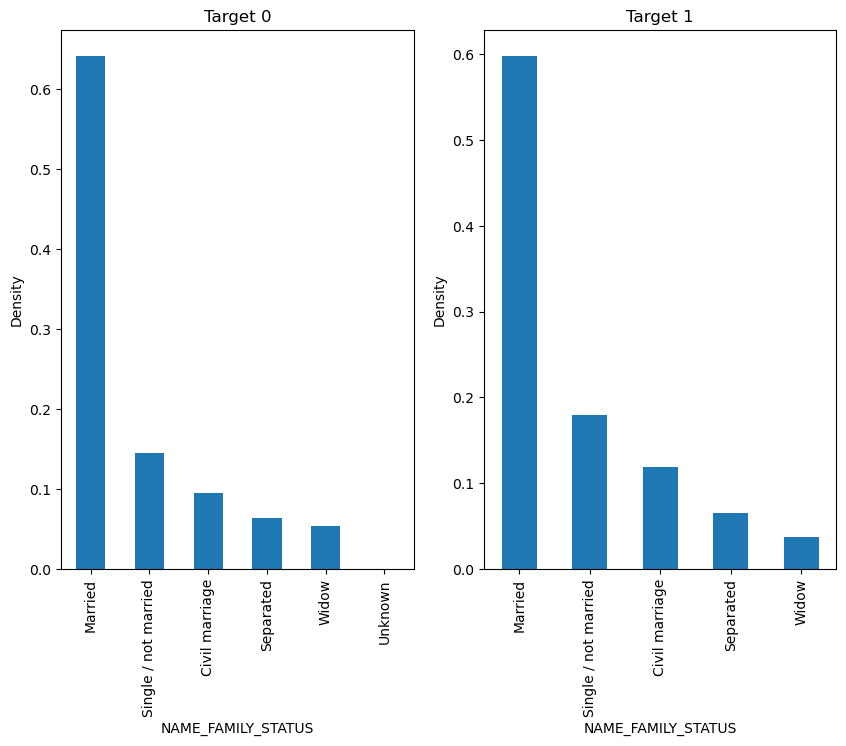



 --------------------------------------- 


plot on NAME_HOUSING_TYPE for Target 0 and 1


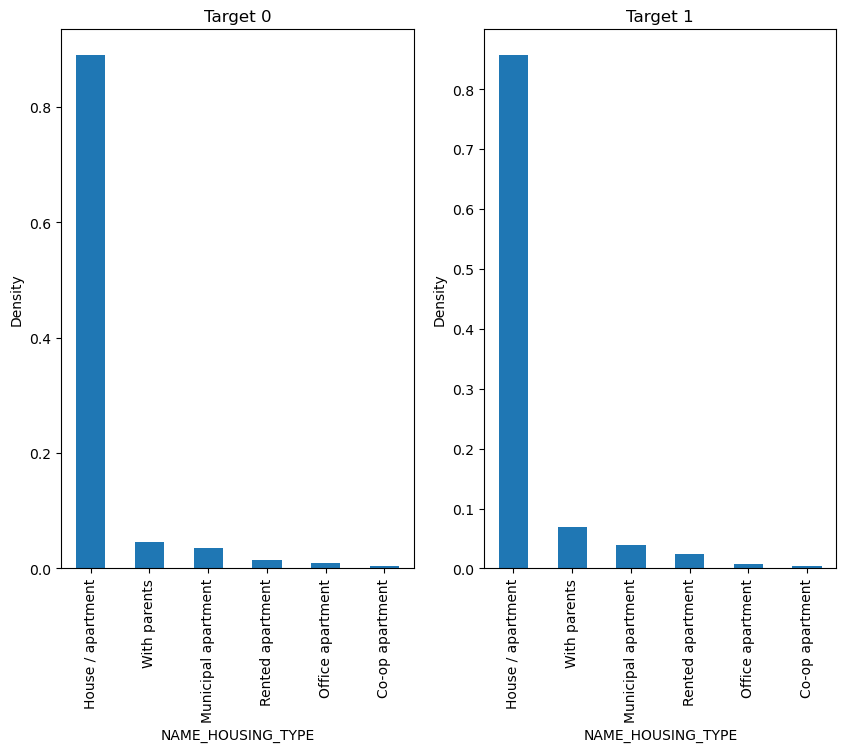



 --------------------------------------- 


plot on OCCUPATION_TYPE for Target 0 and 1


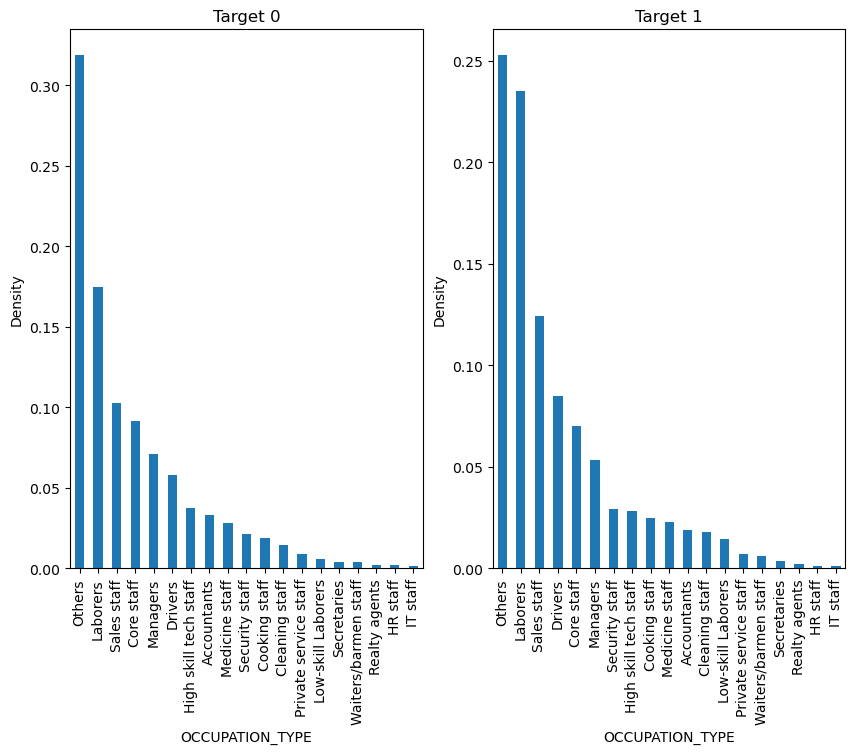



 --------------------------------------- 


plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


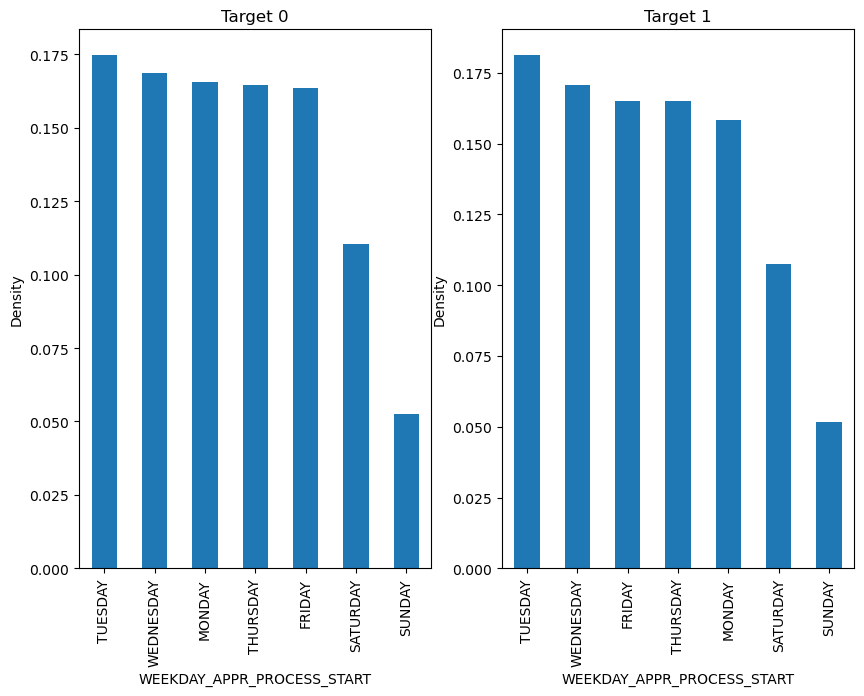



 --------------------------------------- 


plot on ORGANIZATION_TYPE for Target 0 and 1


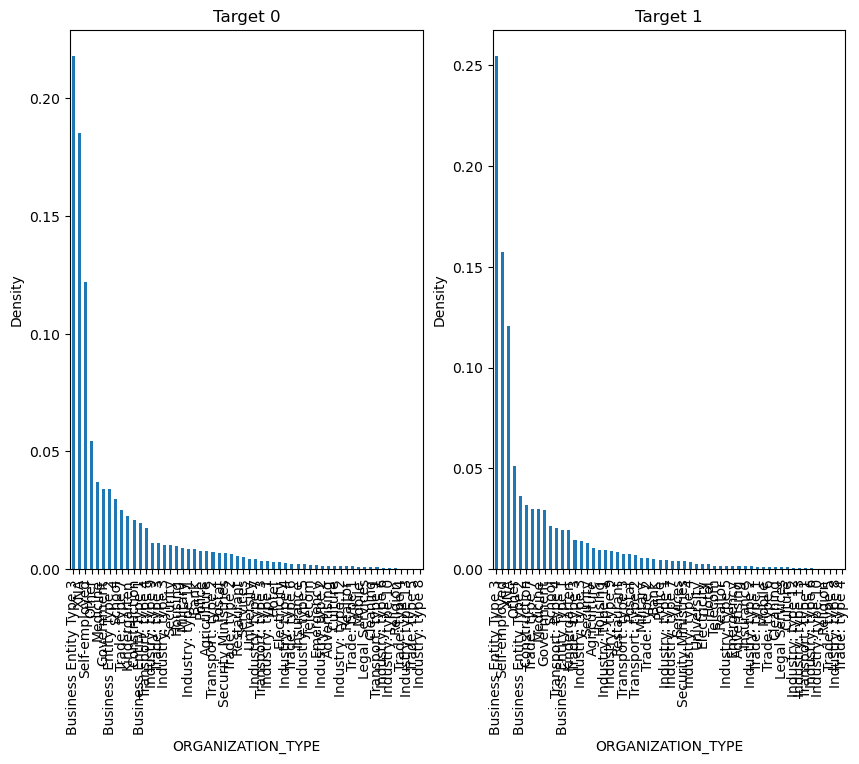



 --------------------------------------- 




In [55]:
for col in cat_cols:
    print(f'plot on {col} for Target 0 and 1')
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n --------------------------------------- \n\n")
    

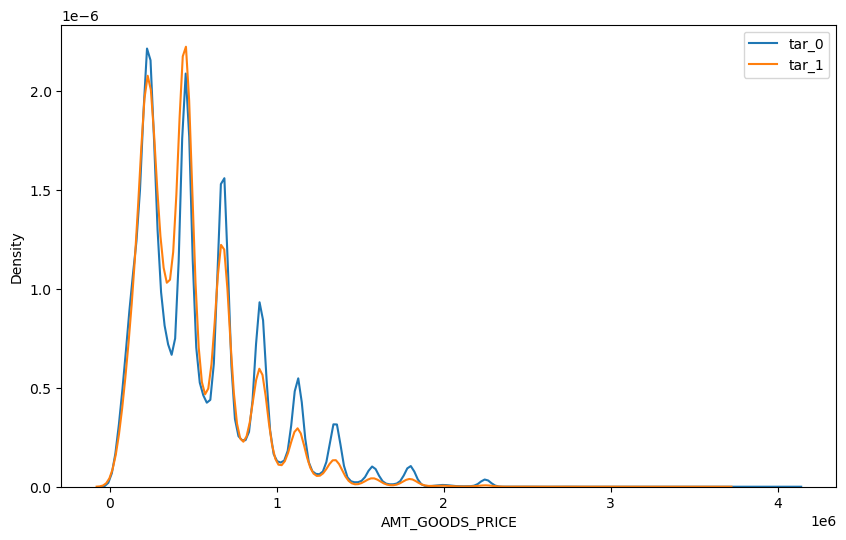

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'], label='tar_0',hist=False)
sns.distplot(tar_1['AMT_GOODS_PRICE'], label='tar_1',hist=False)
plt.legend()
plt.show()

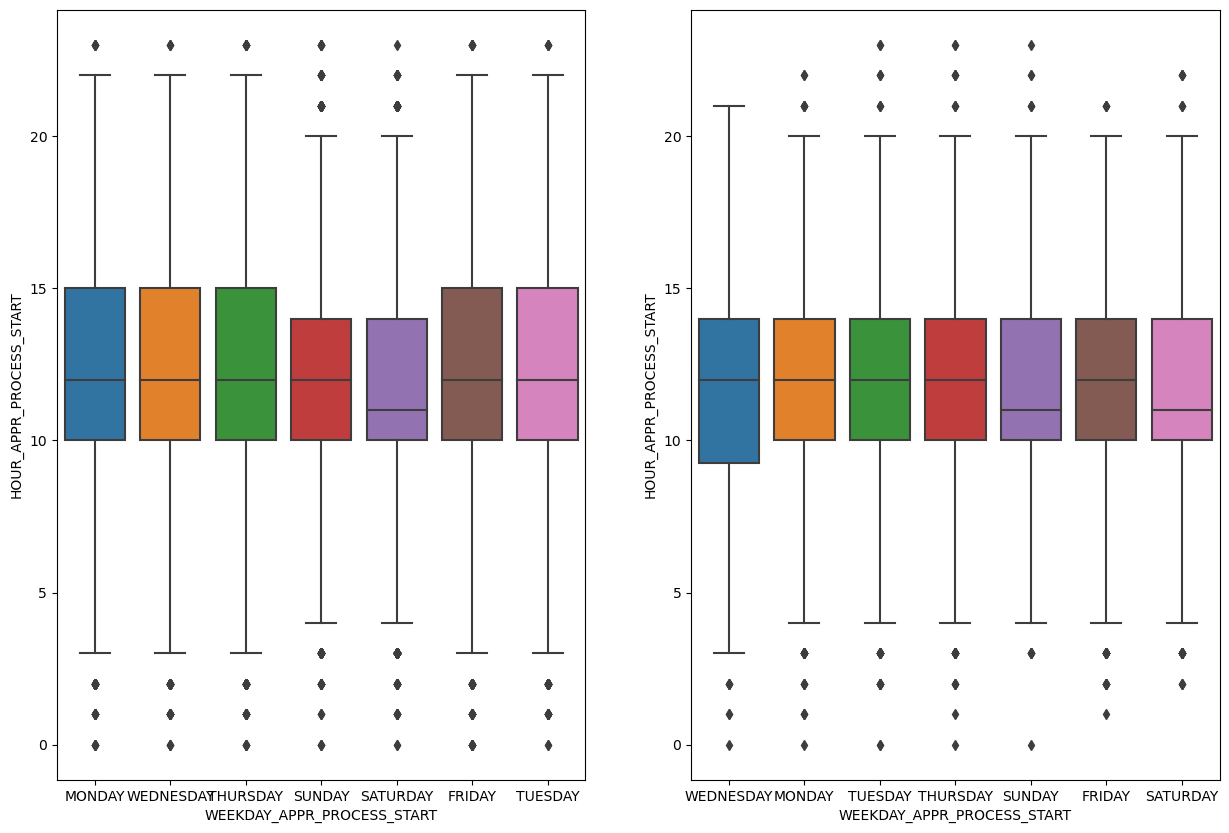

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y = 'HOUR_APPR_PROCESS_START',data = tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y = 'HOUR_APPR_PROCESS_START',data = tar_1)
plt.show()

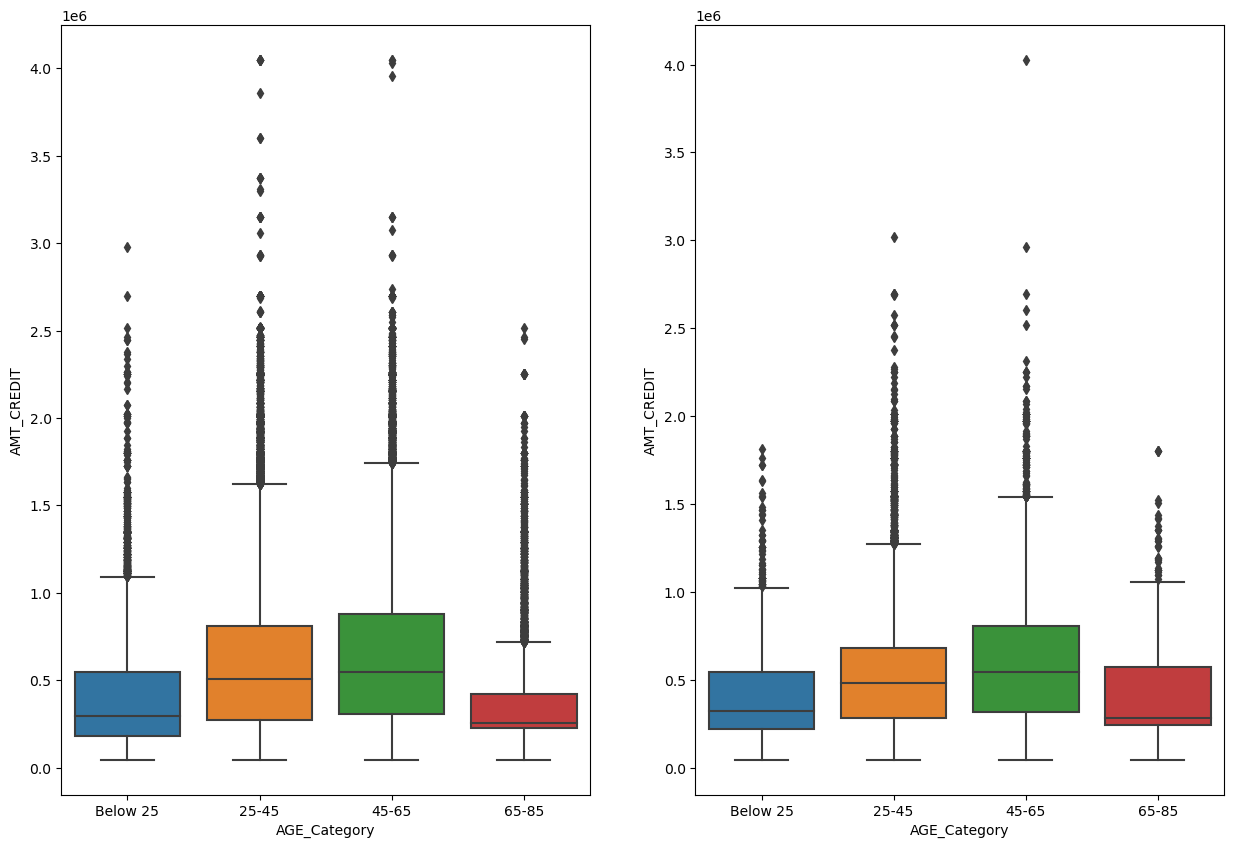

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='AGE_Category',y = 'AMT_CREDIT',data = tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_Category',y = 'AMT_CREDIT',data = tar_1)
plt.show()

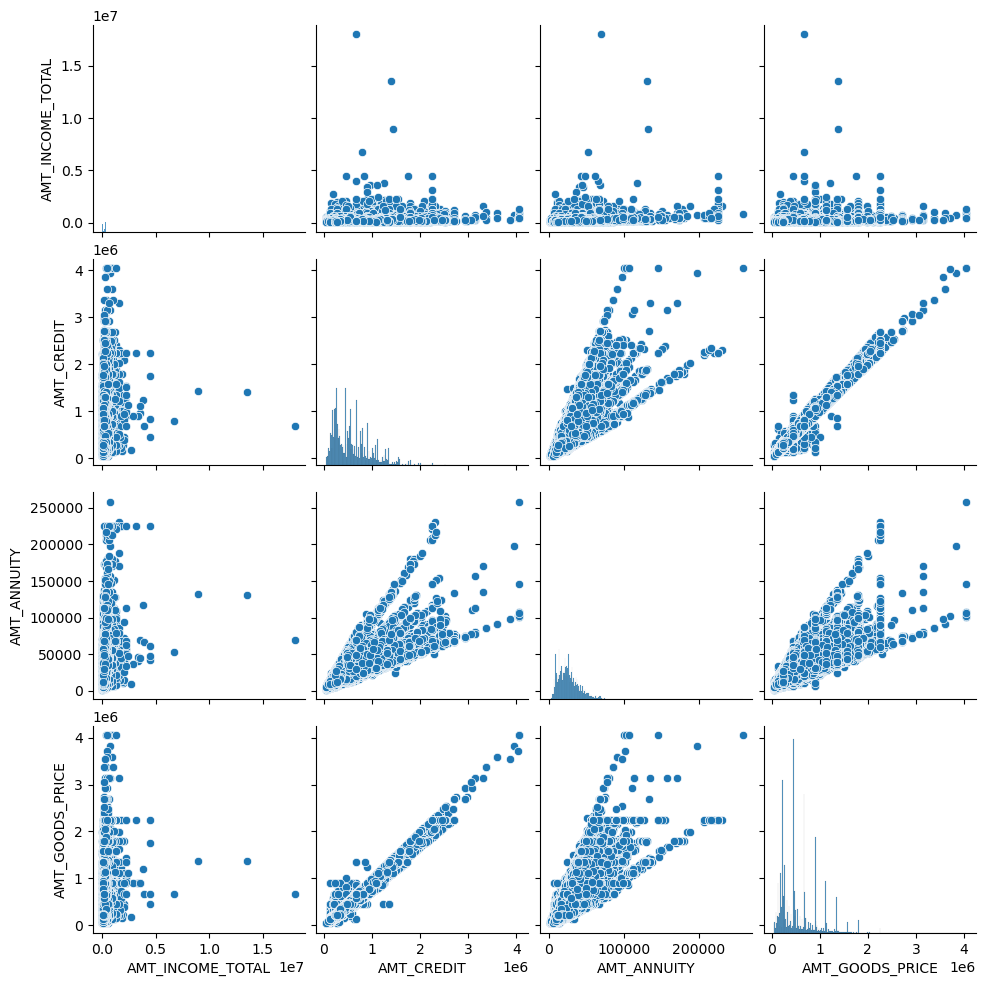

In [59]:
sns.pairplot(tar_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

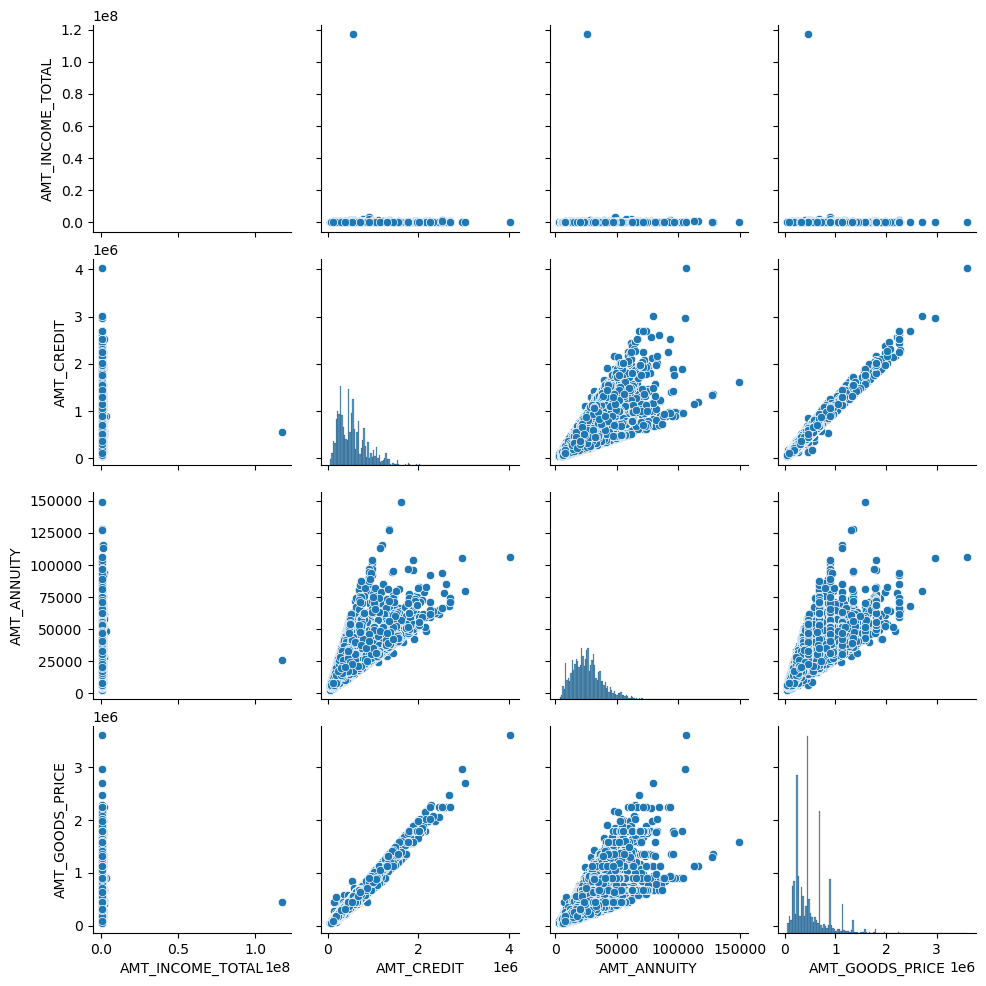

In [60]:
sns.pairplot(tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

In [61]:
corr_data = app_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,26,1,10,5,3
1,270000.0,1293502.5,35698.5,1129500.0,47,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,53,0,11,7,2
3,135000.0,312682.5,29686.5,297000.0,53,8,27,6,1
4,121500.0,513000.0,21865.5,513000.0,55,8,12,9,3


In [62]:
corr_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632,-0.027239,-0.063837,-0.027882,-0.008459,0.018571
AMT_CREDIT,0.156870,1.000000,0.770127,0.986734,0.055373,-0.064321,-0.009590,0.006942,0.077257
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774837,-0.009519,-0.102849,-0.038487,-0.011376,0.064494
AMT_GOODS_PRICE,0.159632,0.986734,0.774837,1.000000,0.053449,-0.062193,-0.011518,0.009647,0.079349
YEARS_BIRTH,-0.027239,0.055373,-0.009519,0.053449,1.000000,0.623745,0.331856,0.272054,0.086317
YEARS_EMPLOYED,-0.063837,-0.064321,-0.102849,-0.062193,0.623745,1.000000,0.214652,0.274644,-0.016424
YEARS_REGISTRATION,-0.027882,-0.009590,-0.038487,-0.011518,0.331856,0.214652,1.000000,0.101831,0.058393
YEARS_ID_PUBLISH,-0.008459,0.006942,-0.011376,0.009647,0.272054,0.274644,0.101831,1.000000,0.092803
YEARS_LAST_PHONE_CHANGE,0.018571,0.077257,0.064494,0.079349,0.086317,-0.016424,0.058393,0.092803,1.000000


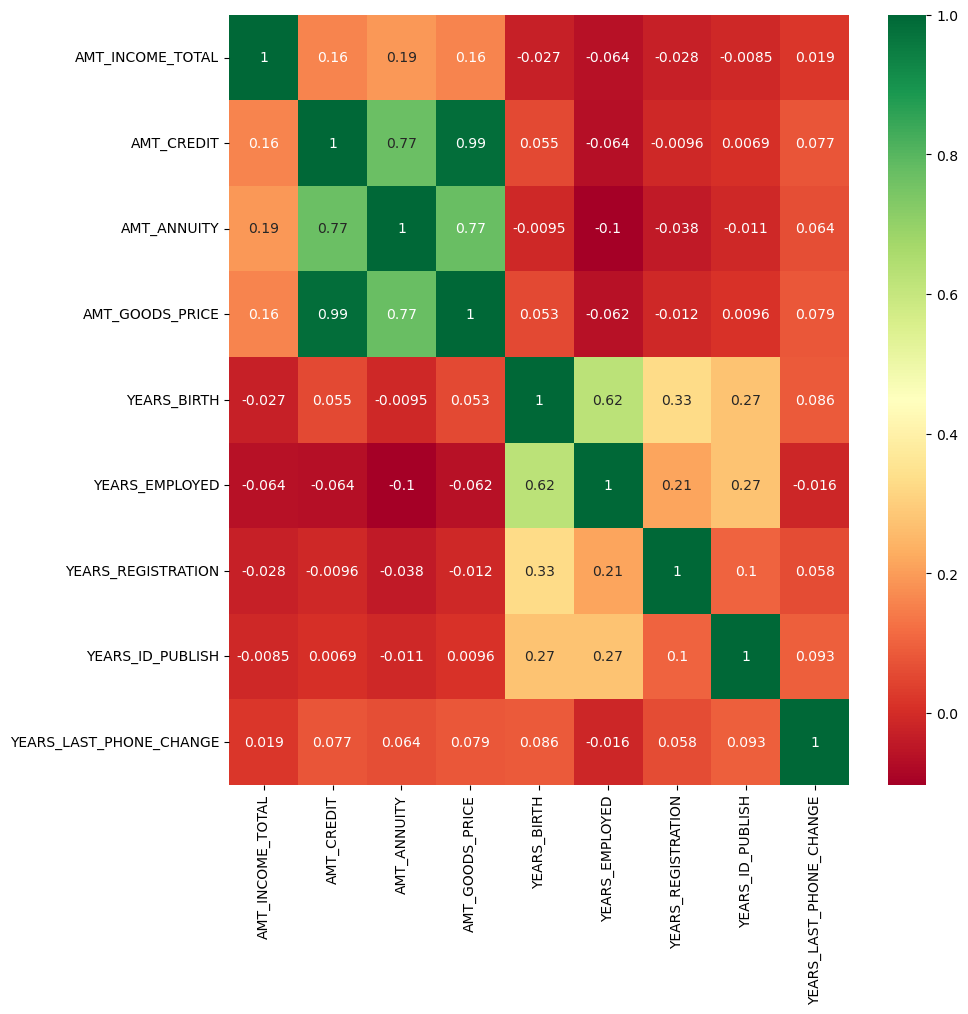

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True, cmap ="RdYlGn")
plt.show()

In [64]:
corr_data_0 = tar_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
1,270000.0,1293502.5,35698.5,1129500.0,47,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,53,0,11,7,2
3,135000.0,312682.5,29686.5,297000.0,53,8,27,6,1
4,121500.0,513000.0,21865.5,513000.0,55,8,12,9,3
5,99000.0,490495.5,27517.5,454500.0,47,4,13,1,7


In [65]:
corr_data_1 = tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,26,1,10,5,3
26,112500.0,979992.0,27076.5,702000.0,52,7,18,5,0
40,202500.0,1193580.0,35028.0,855000.0,49,3,3,2,3
42,135000.0,288873.0,16258.5,238500.0,37,10,0,12,4
81,81000.0,252000.0,14593.5,252000.0,69,1025,15,11,0


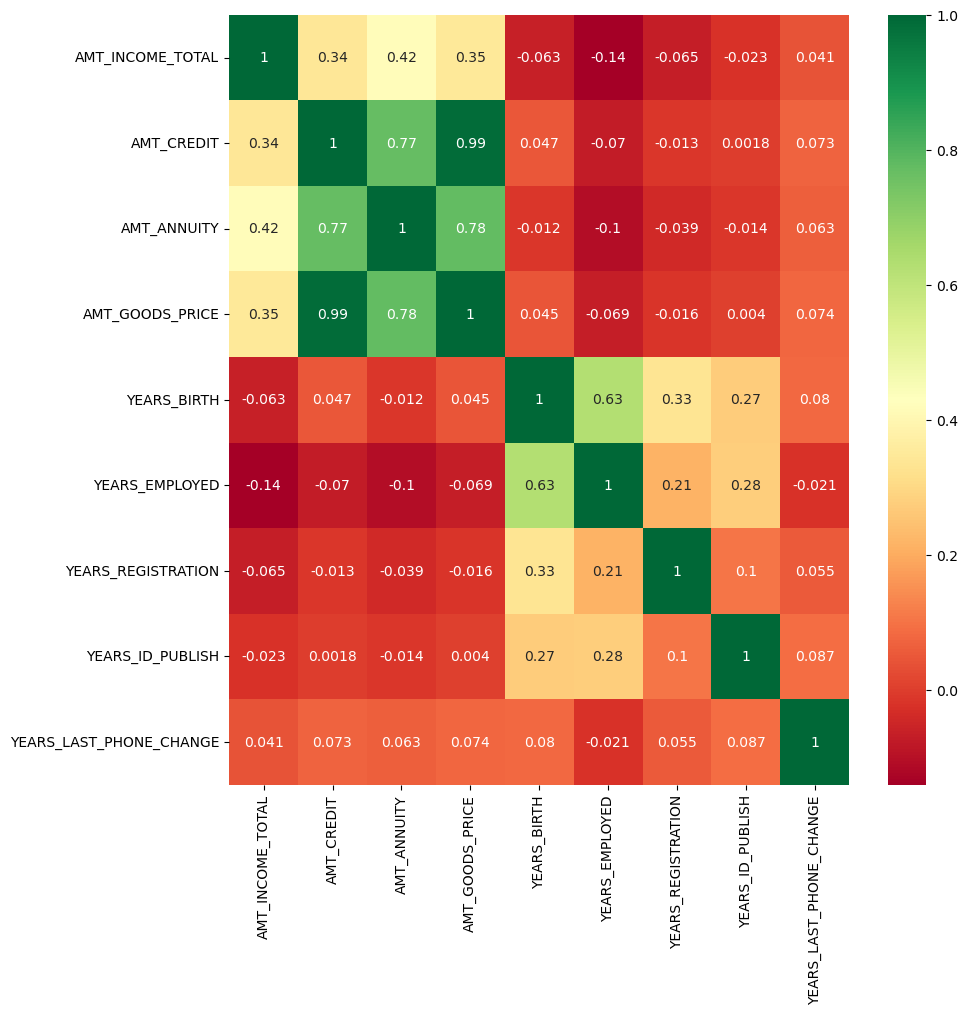

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True, cmap ="RdYlGn")
plt.show()

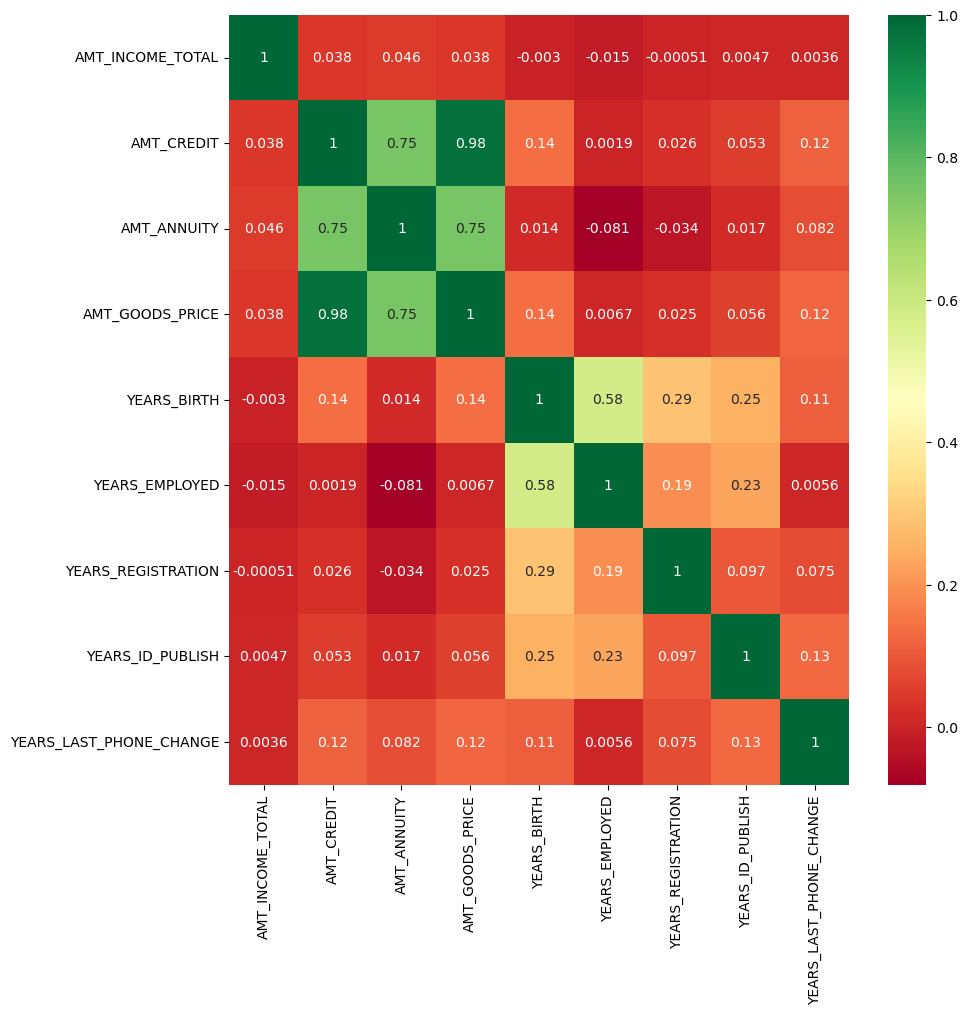

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True, cmap ="RdYlGn")
plt.show()

In [68]:
papp_data = pd.read_csv(r"C:\Users\Admin\Downloads\previous_application.csv (1)\previous_application.csv")
papp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [70]:
papp_data.shape

(1670214, 37)

In [71]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [72]:
percentage = 49
threshold_p = int(((100-percentage)/100)*papp_data.shape[0] + 1)
papp_df = papp_data.dropna(axis = 1, thresh = threshold_p)
papp_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
papp_df.shape

(1670214, 32)

In [74]:
papp_df.DAYS_FIRST_DRAWING =papp_df.DAYS_FIRST_DRAWING.apply(lambda x: abs(x))
papp_df.DAYS_FIRST_DUE = papp_df.DAYS_FIRST_DUE.apply(lambda x: abs(x)) 
papp_df.DAYS_LAST_DUE_1ST_VERSION = papp_df.DAYS_LAST_DUE_1ST_VERSION.apply(lambda x: abs(x))
papp_df.DAYS_LAST_DUE = papp_df.DAYS_LAST_DUE.apply(lambda x: abs(x)) 
papp_df.DAYS_TERMINATION = papp_df.DAYS_TERMINATION.apply(lambda x: abs(x))
papp_df.DAYS_DECISION = papp_df.DAYS_DECISION.apply(lambda x: abs(x))

In [75]:
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x: abs(x))

In [76]:
null_Cols = list(papp_df.columns[papp_df.isna().any()])
len(null_Cols)

11

In [77]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [78]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [79]:
papp_df["AMT_CREDIT_Category"]=pd.cut(papp_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],
                                     labels=["Very low Credit", "Low Credit", "Medium Credit","High Credit", "Very high Credit"])

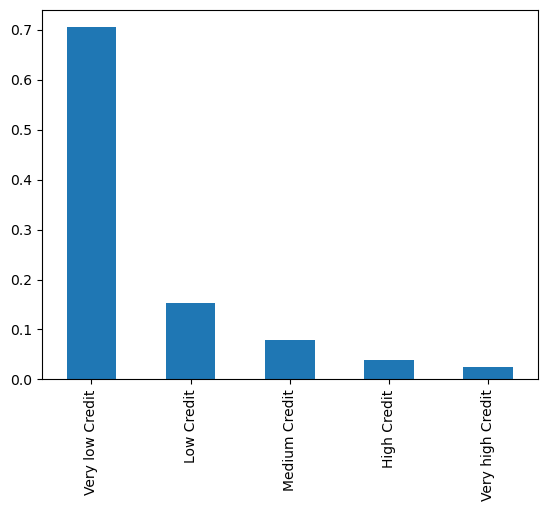

In [80]:
papp_df['AMT_CREDIT_Category'].value_counts(normalize=True).plot.bar()
plt.show()

In [82]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.qcut(papp_df.AMT_GOODS_PRICE,[0,0.25,0.45,0.65, 0.85,1],
                               labels = ["Very-low price", "low price", "Medium price", "High price","Very-high price"])

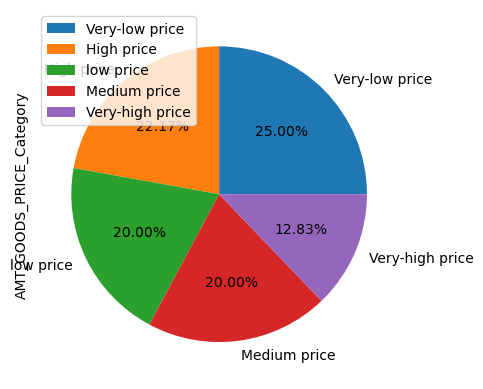

In [83]:
papp_df["AMT_GOODS_PRICE_Category"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

In [84]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Approved']
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Cancelled']
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Refused']
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Unused']

<function matplotlib.pyplot.show(close=None, block=None)>

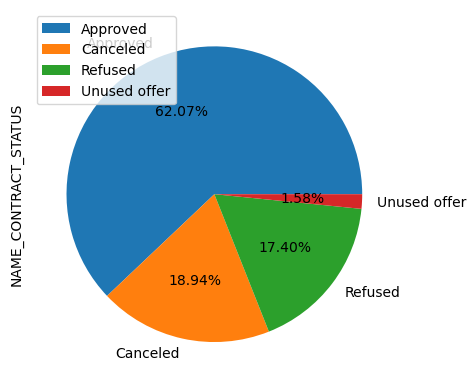

In [85]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show

In [86]:
cat_cols = list(papp_df.columns[papp_df.dtypes == np.object])
num_cols = list(papp_df.columns[papp_df.dtypes == np.int64]) + list(papp_df.columns[papp_df.dtypes == np.float64])

In [87]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [88]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [89]:
cat_cols = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']

In [90]:
num_cols = ['HOUR_APPR_PROCESS_START', 'DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64


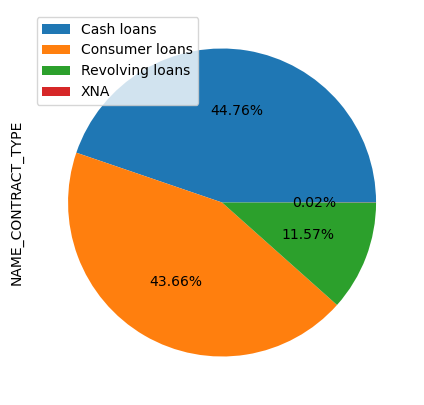

------------------------
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


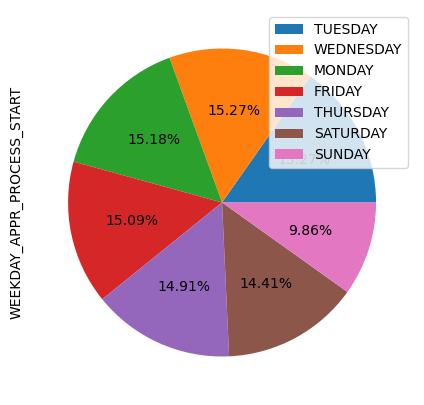

------------------------
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64


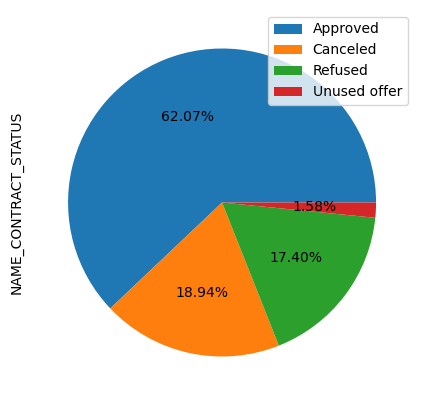

------------------------
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64


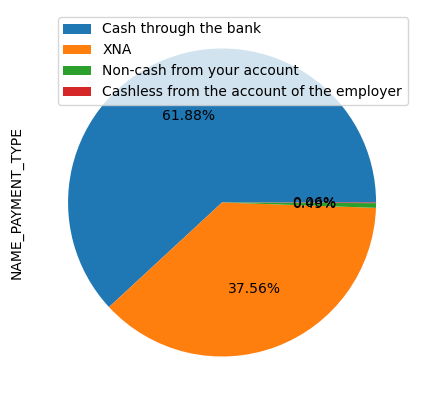

------------------------
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64


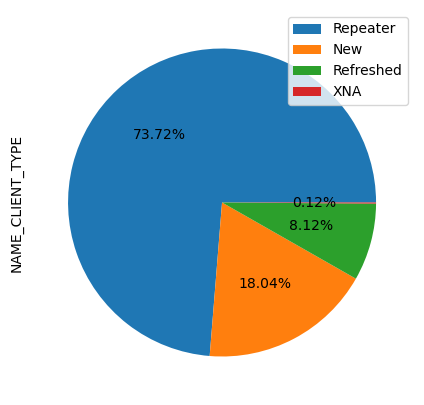

------------------------
XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                

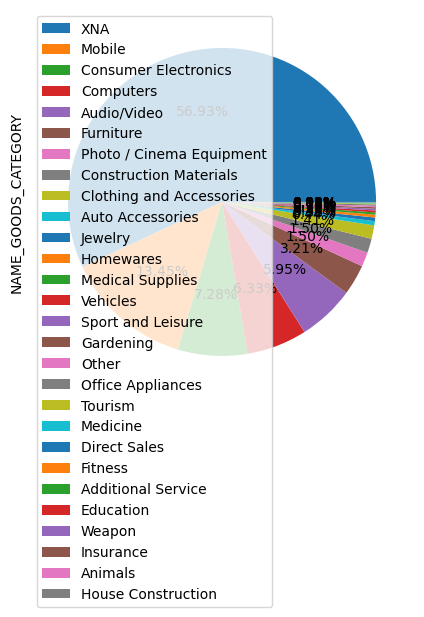

------------------------
POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64


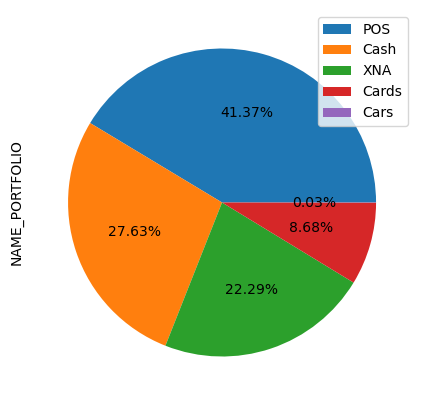

------------------------
XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64


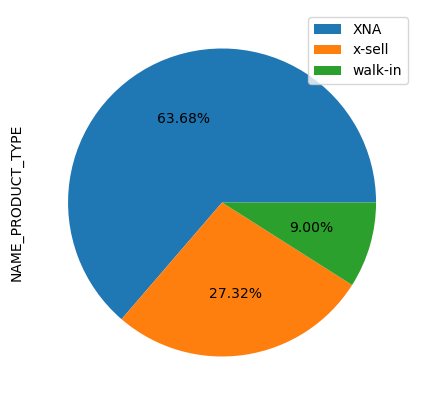

------------------------
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64


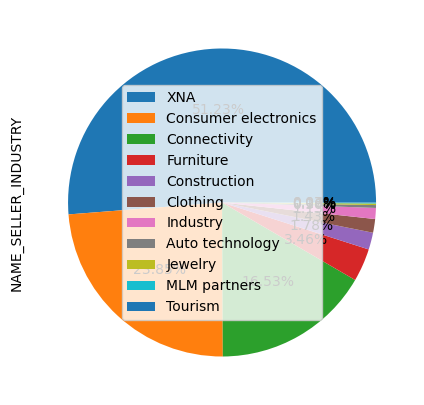

------------------------
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64


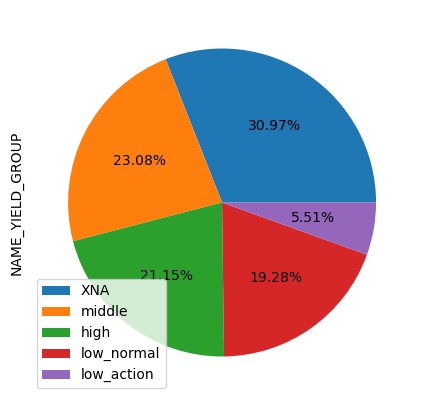

------------------------


In [91]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize = True)*100)
    plt.figure(figsize=[5,5])
    papp_df[col].value_counts(normalize=True).plot.pie(labeldistance = None, autopct = '%1.2f%%')
    plt.legend()
    plt.show()
    print('------------------------')

99th percentile  20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


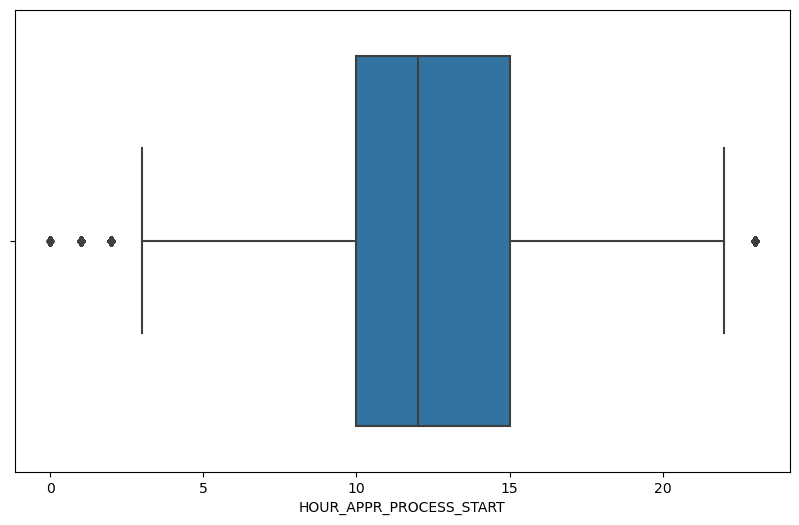

------------------
99th percentile  2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


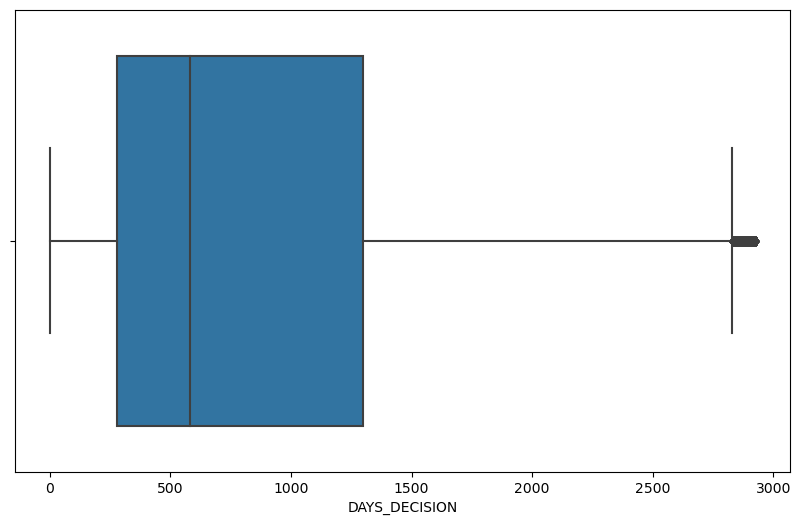

------------------
99th percentile  nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


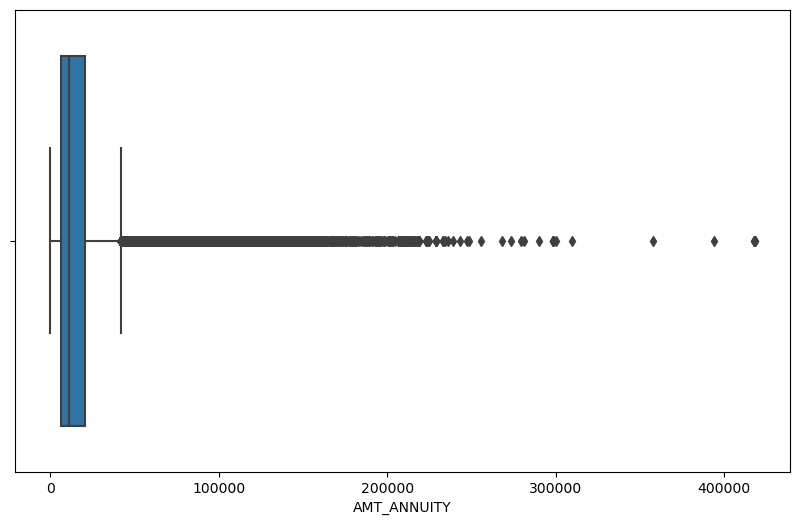

------------------
99th percentile  1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


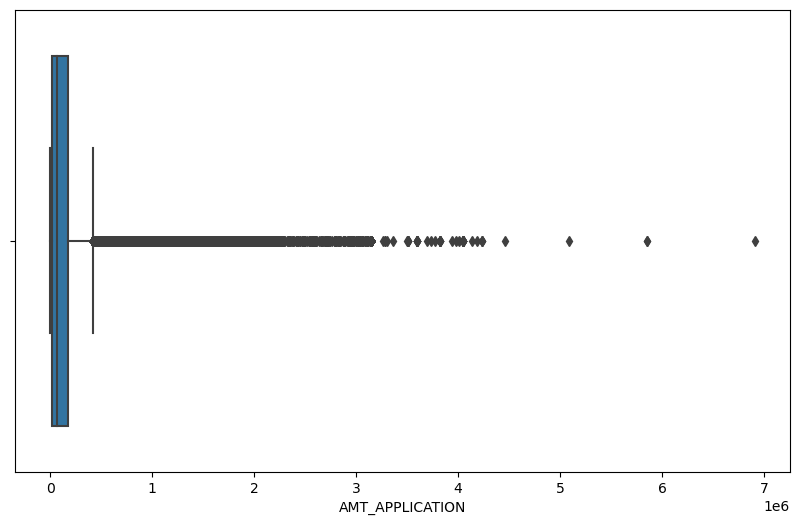

------------------
99th percentile  nan
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


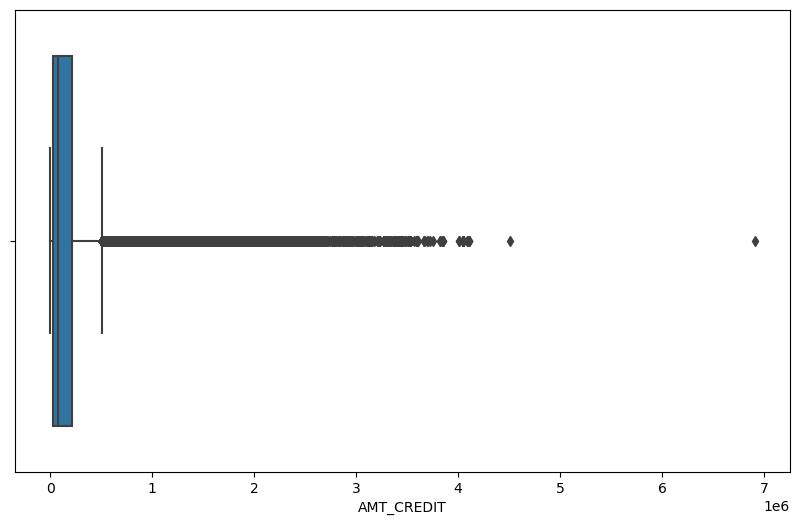

------------------
99th percentile  nan
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


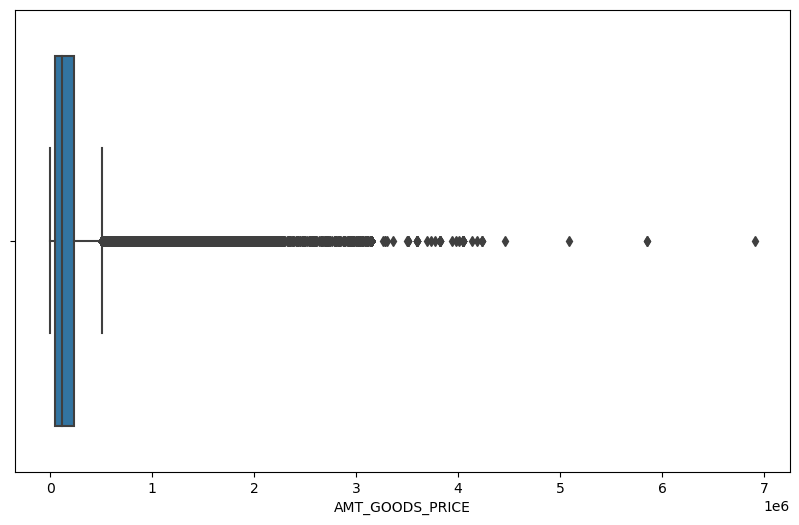

------------------
99th percentile  nan
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


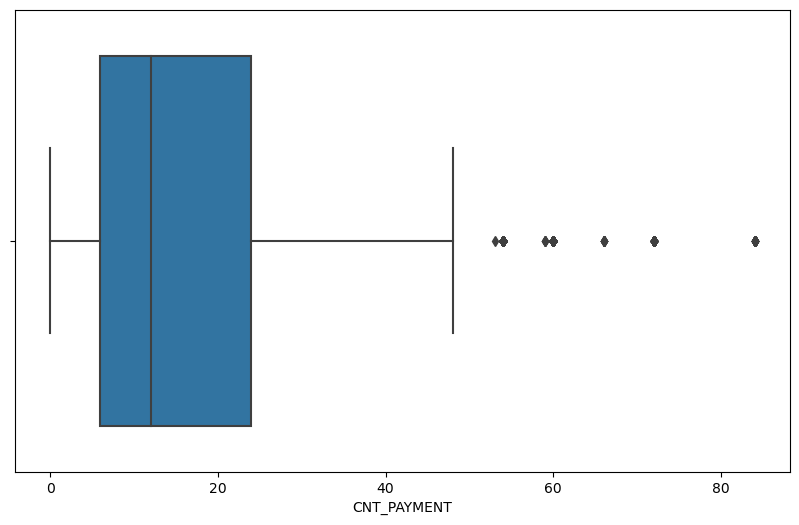

------------------


In [92]:
for col in num_cols:
    print("99th percentile ",np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize = [10,6])
    sns.boxplot(data=papp_df, x=col)
    plt.show()
    print("------------------")

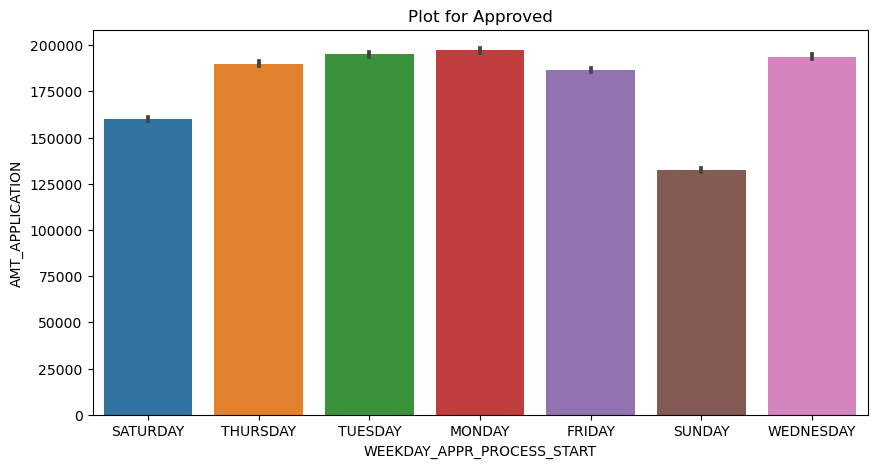

In [93]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y = 'AMT_APPLICATION',data = approved)
plt.title("Plot for Approved")
plt.show()

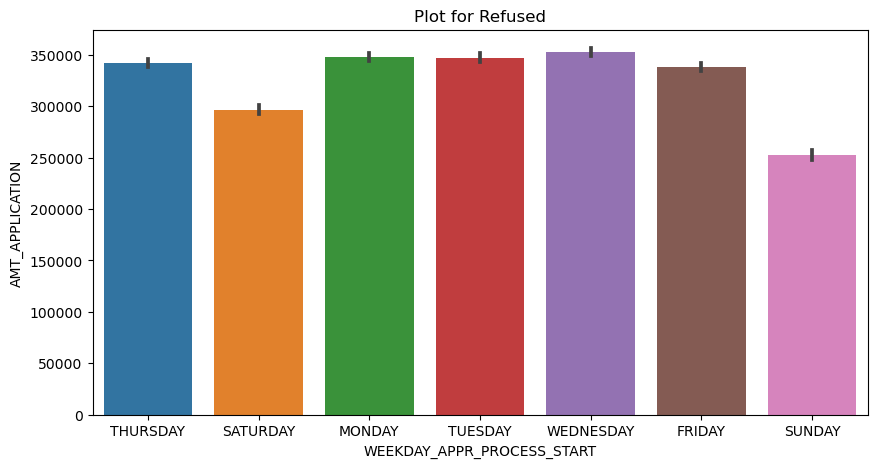

In [94]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y = 'AMT_APPLICATION',data = refused)
plt.title("Plot for Refused")
plt.show()

<Axes: title={'center': 'Unused'}>

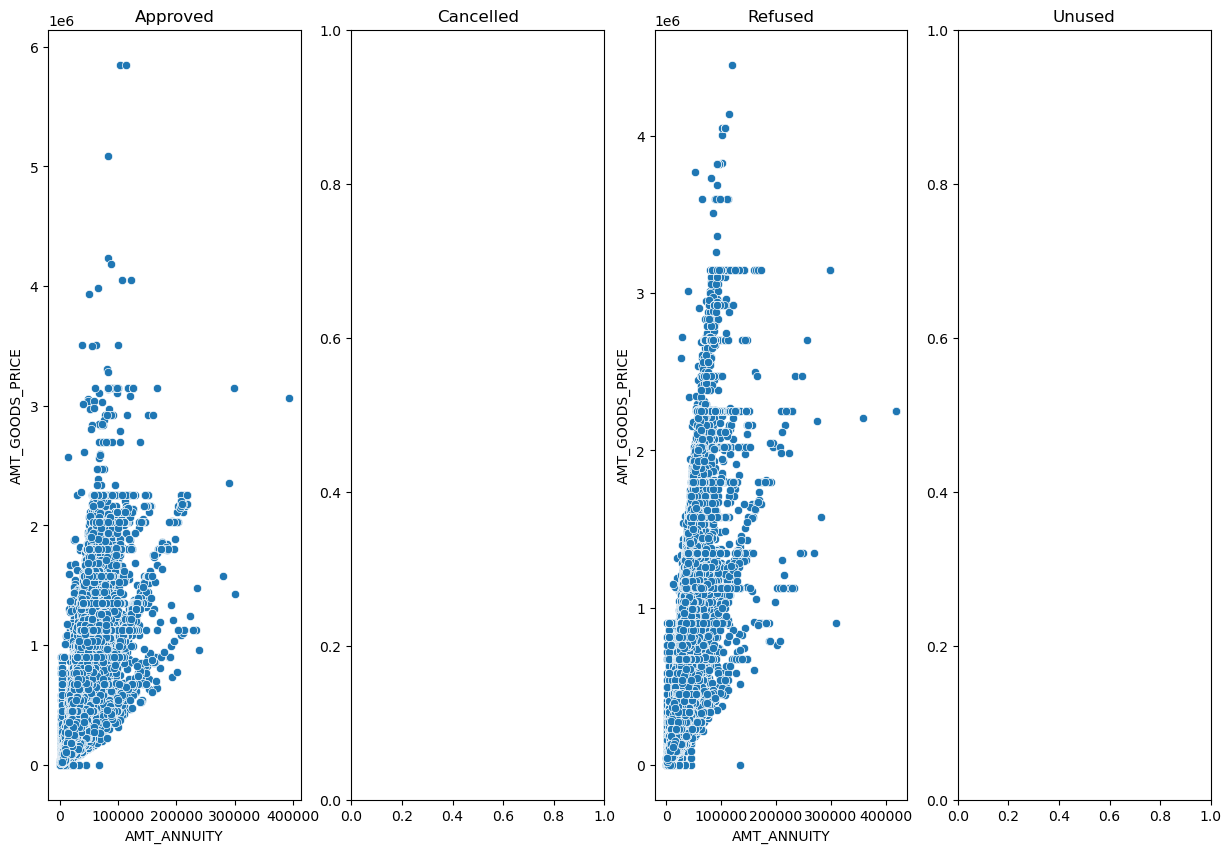

In [95]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=approved)
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=cancelled)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=refused)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=unused)

In [96]:
corr_approved = approved [["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE","CNT_PAYMENT"]] 
corr_refused = refused[["DAYS_DECISION", "AMT_ANNUITY","AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_cancelled = cancelled[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
corr_unused = unused[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]

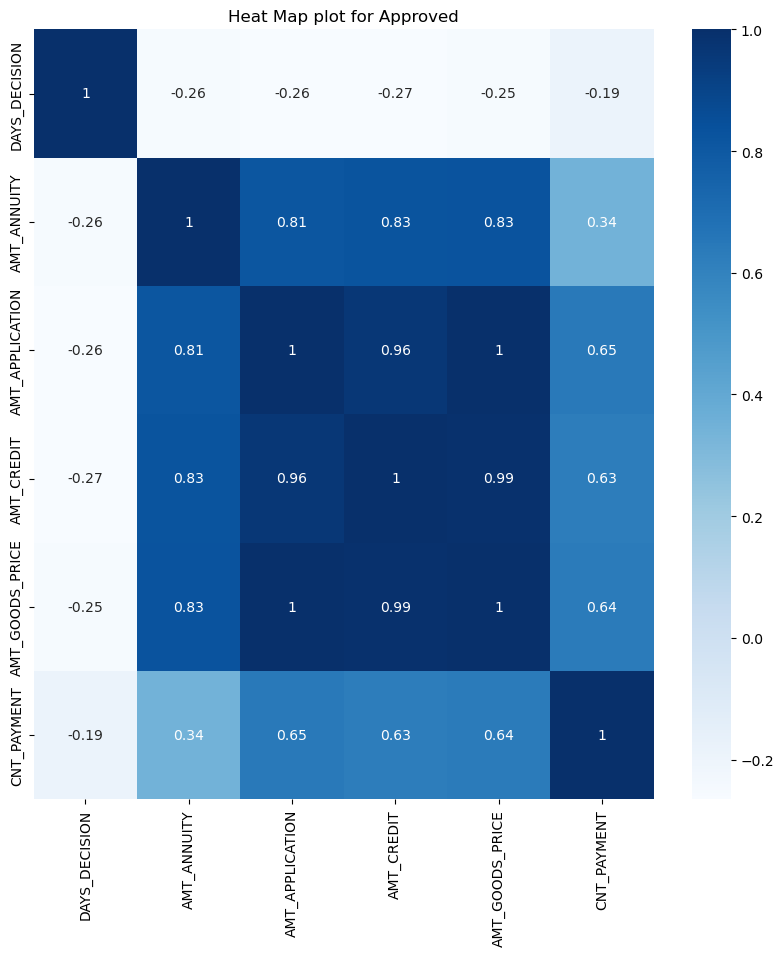

In [97]:
plt.figure(figsize=[10,10])

sns.heatmap(corr_approved.corr(), annot=True, cmap="Blues")

plt.title("Heat Map plot for Approved")

plt.show()

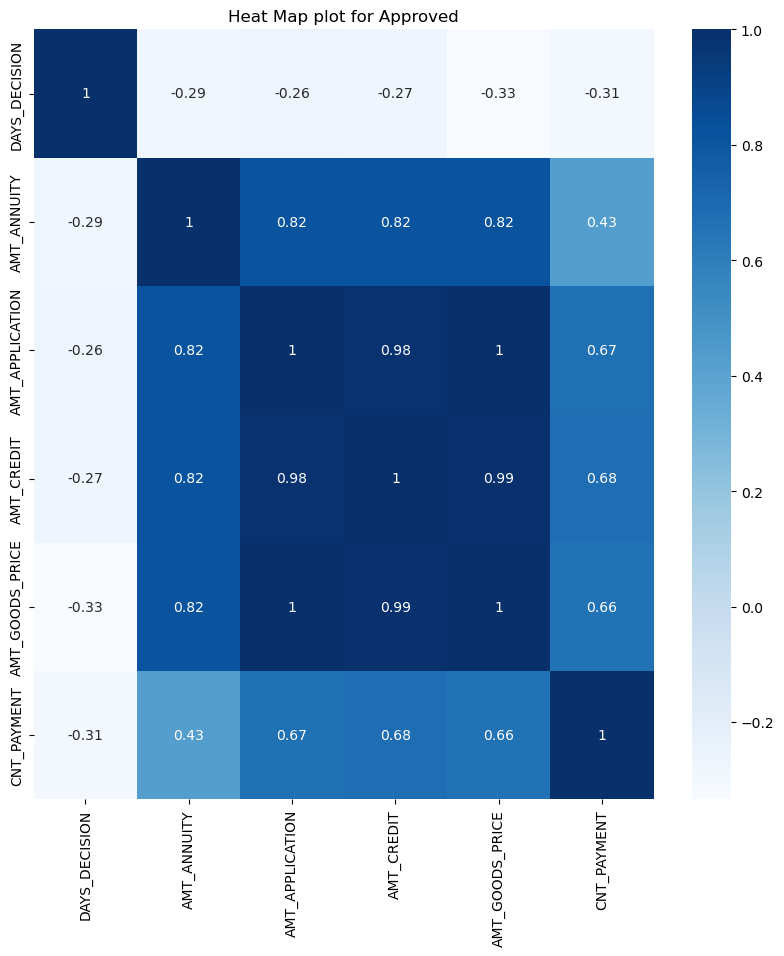

In [98]:
plt.figure(figsize=[10,10])

sns.heatmap(corr_refused.corr(), annot=True, cmap="Blues")

plt.title("Heat Map plot for Approved")

plt.show()

In [99]:
merge_df = app_df.merge(papp_df, on=["SK_ID_CURR"], how = 'left') 
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_Category_x,AGE_Category,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CREDIT_Category_y,AMT_GOODS_PRICE_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,1,10,5,3,Medium Credit,25-45,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,Very low Credit,High price
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,47,3,3,0,2,NaN,45-65,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,NaN,Very-high price
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,47,3,3,0,2,NaN,45-65,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,Low Credit,High price
3,100003,0,Cash

In [100]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 113 entries, SK_ID_CURR to AMT_GOODS_PRICE_Category
dtypes: category(4), float64(36), int64(46), object(27)
memory usage: 1.2+ GB


In [101]:
for col in merge_df.columns:
    if col.startswith("FLAG"): merge_df.drop(columns=col, axis=1, inplace=True)

In [102]:
merge_df.shape

(1430155, 84)

In [103]:
res1= pd.pivot_table(data= merge_df, index=["NAME_INCOME_TYPE", "NAME_CLIENT_TYPE"], columns=["NAME_CONTRACT_STATUS"] , values = "TARGET", aggfunc="mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

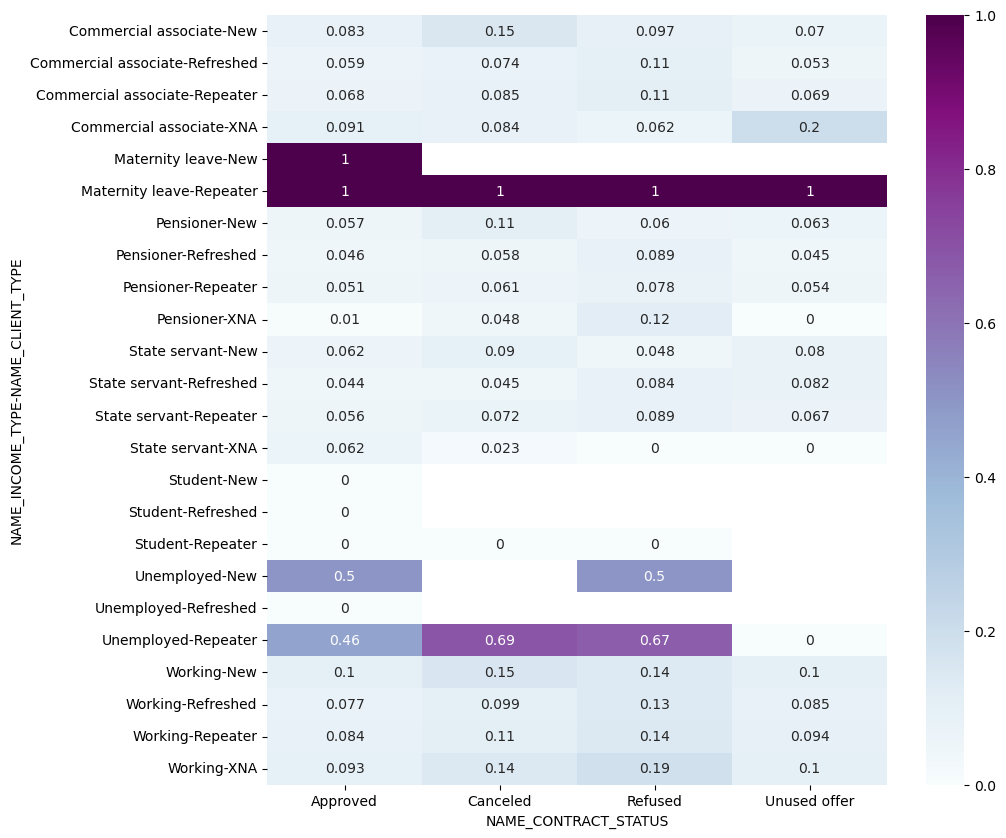

In [104]:
plt.figure(figsize=[10,10])
sns.heatmap(res1, annot=True, cmap='BuPu')
plt.show()

In [105]:
res2= pd.pivot_table(data=merge_df, index=["CODE_GENDER", "NAME_SELLER_INDUSTRY"], columns=["TARGET"], values ="AMT_GOODS_PRICE_x", aggfunc="sum")

In [106]:
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

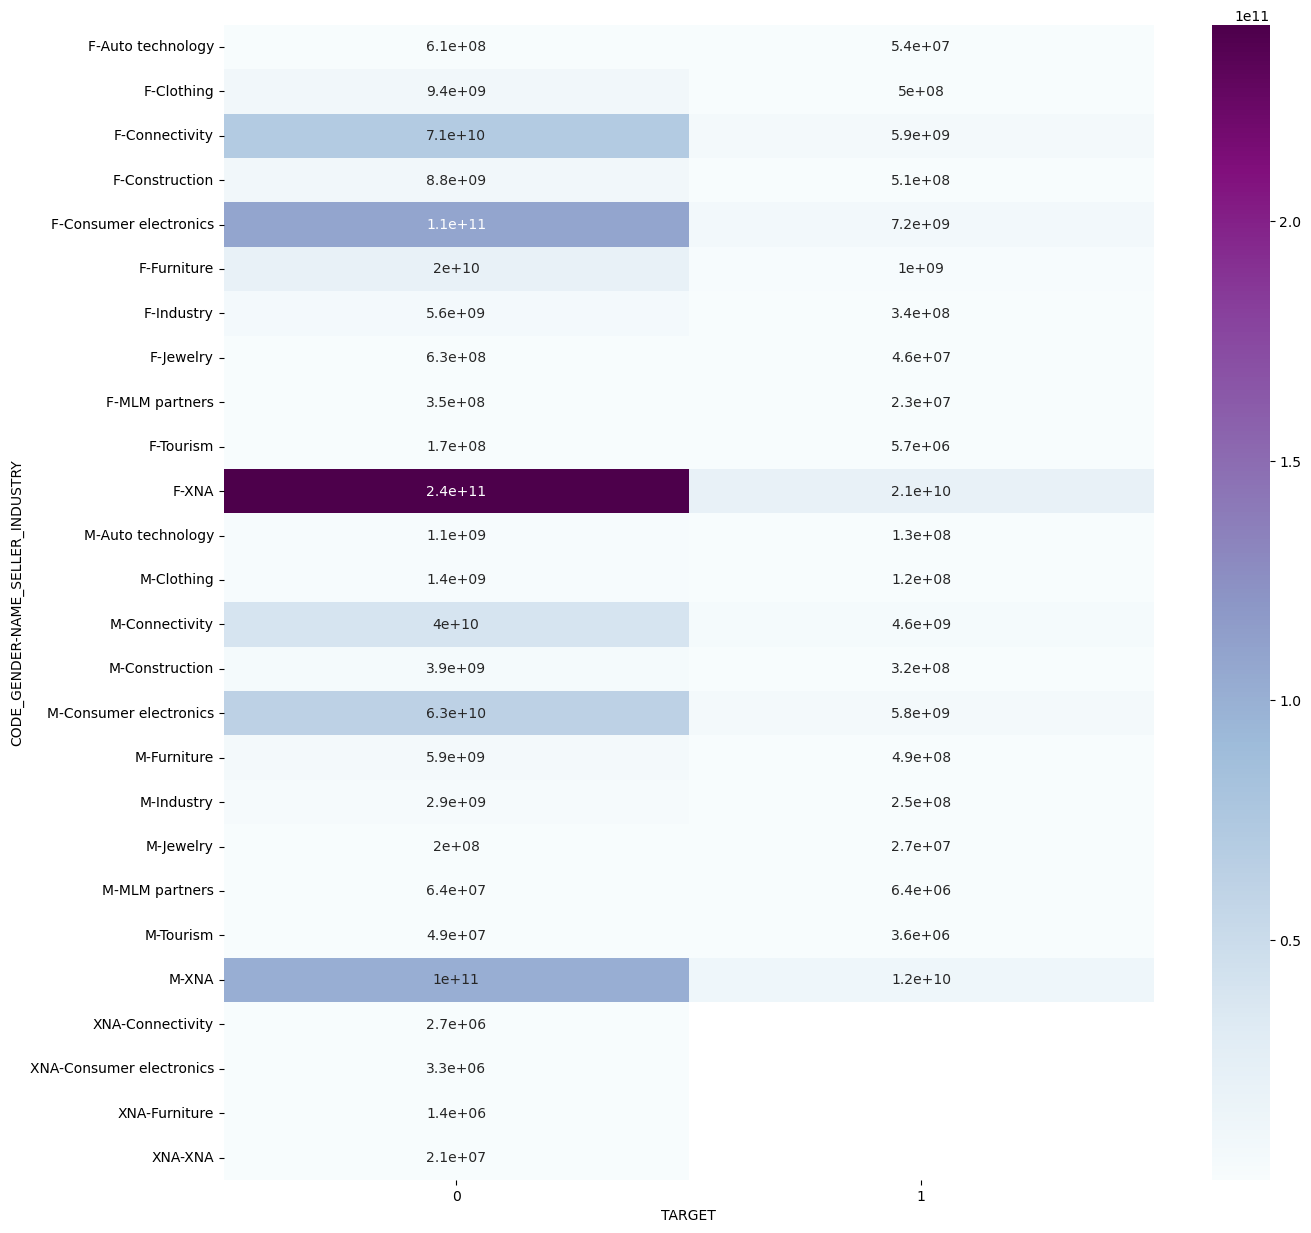

In [107]:
plt.figure(figsize=[15,15]) 
sns.heatmap(res2, annot=True, cmap='BuPu')
plt.show()